# Анализ данных интернет-магазина по продаже компьютерных игр.


In [1]:
#импортируем необходимые нам библиотеки

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np
import statistics as st
import random as rnd
from scipy import stats as st

In [2]:
pd.set_option('display.max_columns',None)
pd.options.display.float_format='{:.2f}'.format
pd.options.mode.chained_assignment = None


In [4]:
#посмотрим, что из себя представляет датасет, какие данные в нем есть

data.head(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.00,Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,1985.00,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.00,Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,2009.00,Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.00,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
data.info() #выводим информацию о ДФ

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.00,16715.00,16715.00,16715.00,16715.00,8137.00
mean,2006.48,0.26,0.15,0.08,0.05,68.97
std,5.88,0.81,0.50,0.31,0.19,13.94
min,1980.00,0.00,0.00,0.00,0.00,13.00
25%,2003.00,0.00,0.00,0.00,0.00,60.00
50%,2007.00,0.08,0.02,0.00,0.01,71.00
75%,2010.00,0.24,0.11,0.04,0.03,79.00
max,2016.00,41.36,28.96,10.22,10.57,98.00


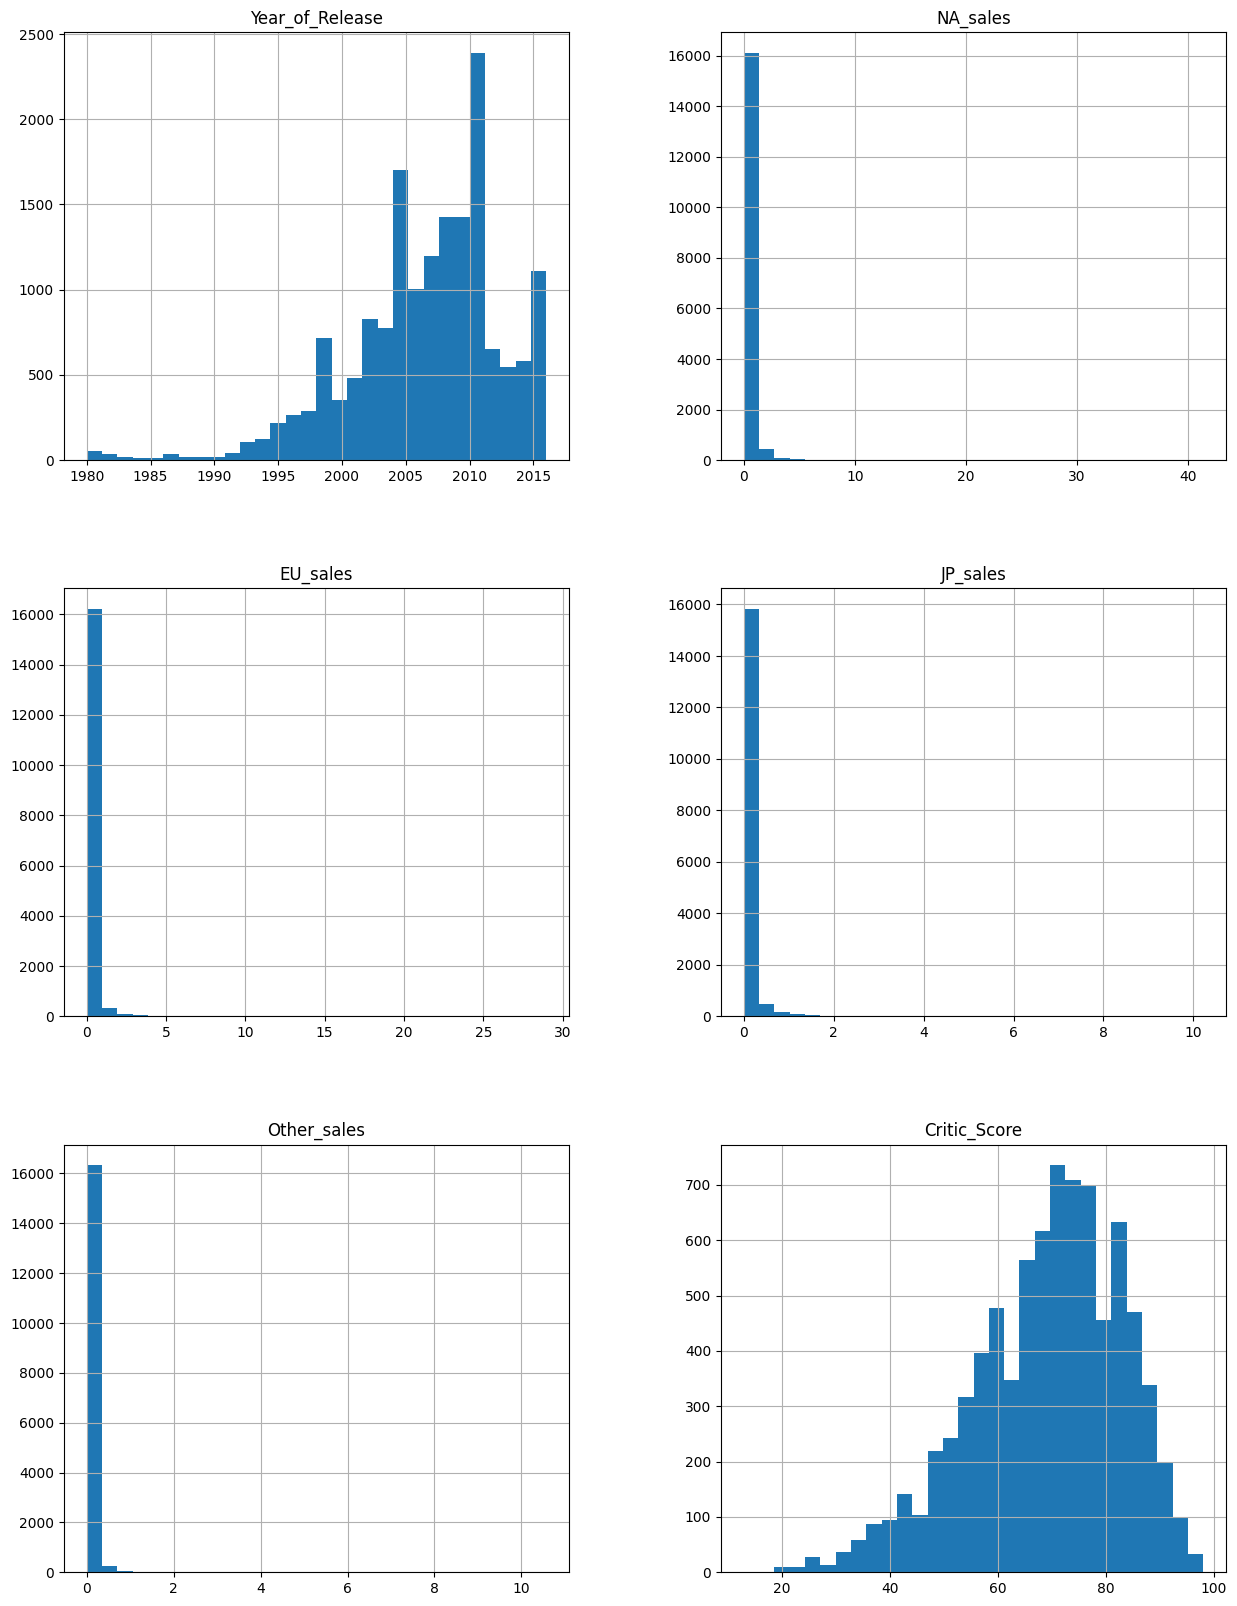

In [7]:
#построим гистограммы всех числовых данных по столбцам

data.hist(bins= 30, figsize=(15, 20));

In [8]:
data.columns = map(str.lower, data.columns) #приводим колонки к нижнему регистру

In [9]:
data.head(5) # выводим 5 строк, чтобы посмотреть изменения

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.00,Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,1985.00,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.00,Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,2009.00,Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.00,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


В данном ДФ `до обработки данных` 16715 строк и 11 колонок.

# Предобработка данных:

**Изучаем данные в столбцах:**

In [10]:
#поиск всех пропущенных знаений в столбцах ДФ

data.isna().sum() 

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [11]:
pd.DataFrame(round(data.isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
name,0.000000
platform,0.000000
year_of_release,1.600000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.300000
user_score,40.100000


In [12]:
#проверяем на наличие явных дубликатов

data.duplicated().sum() 

0

In [13]:
#смотрим уникальные значения и кол-во пропусков

display (data['name'].sort_values())
display (data['name'].isna().sum())

14983                  Beyblade Burst
1079                Fire Emblem Fates
3358             Frozen: Olaf's Quest
3862             Frozen: Olaf's Quest
13794      Haikyu!! Cross Team Match!
                     ...             
8280     uDraw Studio: Instant Artist
475        wwe Smackdown vs. Raw 2006
9134     ¡Shin Chan Flipa en colores!
659                               NaN
14244                             NaN
Name: name, Length: 16715, dtype: object

2

In [14]:
#смотрим, в каких строках пропущены названия и можно ли удалить их

display (data.loc[[659]])
display (data.loc[[14244]])


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.00,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
14244,NaN,GEN,1993.00,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [15]:
display (data.loc[[3358]])
display (data.loc[[3862]])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
3358,Frozen: Olaf's Quest,3DS,2013.00,Platform,0.27,0.27,0.00,0.05,NaN,NaN,NaN


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
3862,Frozen: Olaf's Quest,DS,2013.00,Platform,0.21,0.26,0.00,0.04,NaN,NaN,NaN


In [16]:
#удаляем строки с пустыми значениями
data.dropna(subset=['name'], inplace=True)

In [17]:
#смотрим уникальные значения и кол-во пропусков

display (data['platform'].unique())
display (data['platform'].isna().sum())


array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

0

In [18]:
#смотрим уникальные значения и кол-во пропусков

display (data['year_of_release'].sort_values())
display (data['year_of_release'].isna().sum())


1764    1980.00
546     1980.00
1968    1980.00
6300    1980.00
5360    1980.00
          ...  
16373       NaN
16405       NaN
16448       NaN
16458       NaN
16522       NaN
Name: year_of_release, Length: 16713, dtype: float64

269

In [19]:
data.loc[[16405]]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.00,6.5,T


In [20]:
#удаляем строки, где не указан год релиза

data.dropna(subset=['year_of_release'], inplace=True) 

In [21]:
#переводим тип в числовой

data['year_of_release'] = data['year_of_release'].astype(int)

In [22]:
data.info() #проверяем данные

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int32(1), object(5)
memory usage: 1.4+ MB


In [23]:
#посмотрим средние и медианные значения года релиза по каждому жанру

sport = data.groupby('genre')['year_of_release'].agg(['median','mean'])
sport

,median,mean
genre,,
Action,2009.00,2008.05
Adventure,2009.00,2008.26
Fighting,2005.00,2004.65
Misc,2008.00,2007.33
Platform,2004.00,2003.86
Puzzle,2007.00,2005.23
Racing,2005.00,2004.86
Role-Playing,2008.00,2007.12
Shooter,2007.00,2006.03


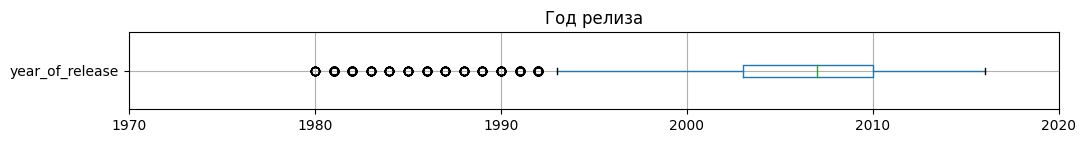

In [24]:
#проверим наличие выбросов, с помощью ящика с усами

fig, ax = plt.subplots(figsize = (12,1))
ax = data[['year_of_release']].boxplot(vert = False, ax =ax)
ax.set_title('Год релиза')
ax.set_xlim(1970, 2020);

In [25]:
#проверяем сколько строк с релизом игры до 1994 г.

len(data.query('year_of_release < 1993')) 

305

In [26]:
#data['year_of_release'] = pd.to_datetime(data['year_of_release'],format = '%Y.%m.%d')

In [27]:
#смотрим уникальные значения и кол-во пропусков

display (data['genre'].unique())
display (data['genre'].isna().sum())

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

0

In [28]:
#посмотрим неявные дубликаты по некоторым столбцам 

duplicate = data[data.duplicated(['name','platform','year_of_release','genre'])]
duplicate

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.00,0.00,83.00,5.5,E


In [29]:
#ищем дубликаты по имени, платформе, году выпуска и жанру

data.loc[data.duplicated(subset = ['name','platform','year_of_release','genre'], keep =False)].head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.00,0.23,83.00,5.5,E
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.00,0.00,83.00,5.5,E


In [30]:
#удаляем дубликат с индексом 16230, т.к. в данной строке данных меньше, чем с индексом 604

data = data.drop(16230)


In [31]:
#проверяем удаление

data.loc[data.duplicated(subset = ['name','platform','year_of_release','genre'], keep =False)].head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [32]:
#проверяем пропуски в столбцах с продажами в мире

display (data['na_sales'].isna().sum())
display (data['eu_sales'].isna().sum())
display (data['jp_sales'].isna().sum())
display (data['other_sales'].isna().sum())

0

0

0

0

In [33]:
#смотрим уникальность и кол-во пропущенных значений в столбцах с оценками критиков и пользователей

display (data['critic_score'].unique())
display (data['critic_score'].isna().sum())

display (data['user_score'].unique())
display (data['user_score'].isna().sum())

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

8461

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

6605

In [34]:
#смотрим данные столбца

data['critic_score'].describe()

count   7982.00
mean      68.99
std       13.92
min       13.00
25%       60.00
50%       71.00
75%       79.00
max       98.00
Name: critic_score, dtype: float64

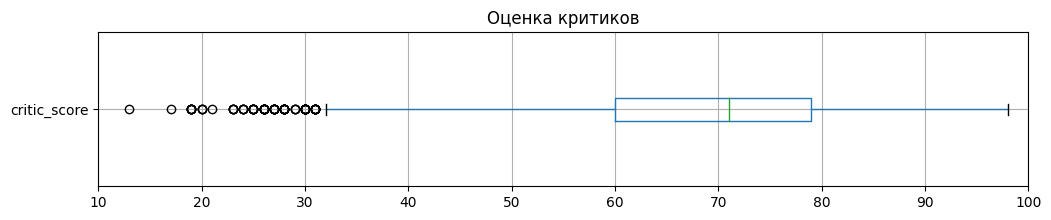

In [35]:
#строим диаграмму размаха

fig, ax = plt.subplots(figsize = (12,2))
ax = data[['critic_score']].boxplot(vert = False, ax =ax)
ax.set_title('Оценка критиков')
ax.set_xlim(10, 100);

In [36]:
#проверим выбросы по квантилям

Q1 = data['critic_score'].quantile(0.25)
Q3 = data['critic_score'].quantile(0.75)
IQR = Q3 - Q1
display (IQR)
display (Q1 - 1.5 * IQR)
display (Q3 + 1.5 * IQR)

19.0

31.5

107.5

In [37]:
#считаем кол-во значений в столбце < 30

len(data.query('critic_score < 30'))

59

In [38]:
#смотрим данные столбца

data['user_score'].describe()

count     9838
unique      96
top        tbd
freq      2376
Name: user_score, dtype: object

In [39]:
#считаем кол-во строк с аббревиатурой

len(data.query('user_score == "tbd"'))

2376

In [40]:
#меняем на пустое значение строки

data['user_score'] = data['user_score'].str.replace('tbd','', regex=True)


In [41]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [42]:
#меняем тип данных на числовой

data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')
data['user_score'] = data['user_score'].astype('float')

In [43]:
data['user_score'].describe()

count   7462.00
mean       7.13
std        1.50
min        0.00
25%        6.40
50%        7.50
75%        8.20
max        9.70
Name: user_score, dtype: float64

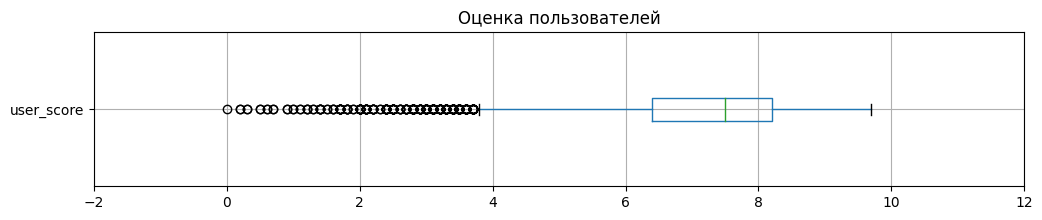

In [44]:
#изучаем диаграмму размаха

fig, ax = plt.subplots(figsize = (12,2))
ax = data[['user_score']].boxplot(vert = False, ax =ax)
ax.set_title('Оценка пользователей')
ax.set_xlim(-2, 12);

In [45]:
#смотрим уникальность и кол-во пропущенных значений в столбцах с рейтингом игр

display (data['rating'].isna().sum())
display (data['rating'].unique())

6676

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [46]:
#меняем пропуски в столбце с рейтингом на "неизвестно"

data['rating'] = data['rating'].fillna('Unknown')


In [47]:
display (data['rating'].isna().sum())
display (data['rating'].unique())
display (data['rating'].value_counts())


0

array(['E', 'Unknown', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

Unknown    6676
E          3920
T          2905
M          1536
E10+       1393
EC            8
K-A           3
AO            1
RP            1
Name: rating, dtype: int64

In [48]:
#меняем рейтинг К-А на Е (Этот рейтинг использовался до 1998 года, после он был переименован в E)

data['rating'] = data['rating'].str.replace('K-A','E', regex=True) 


In [49]:
display (data['rating'].value_counts())


Unknown    6676
E          3923
T          2905
M          1536
E10+       1393
EC            8
AO            1
RP            1
Name: rating, dtype: int64

In [50]:
#изучаем строки с малочисленными группами

display (data.query('rating == "EC"'))
display (data.query('rating == "AO"'))
display (data.query('rating == "RP"'))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
4297,Nickelodeon Team Umizoomi,DS,2011,Action,0.42,0.00,0.00,0.03,NaN,NaN,EC
5034,Sesame Street: Elmo's A-to-Zoo Adventure,Wii,2010,Misc,0.35,0.00,0.00,0.02,NaN,NaN,EC
6046,Sesame Street: Cookie's Counting Carnival,Wii,2010,Misc,0.27,0.00,0.00,0.02,NaN,NaN,EC
6764,Dora the Explorer: Journey to the Purple Planet,PS2,2005,Adventure,0.12,0.09,0.00,0.03,NaN,7.00,EC
7586,"Ni Hao, Kai-lan: New Year's Celebration",DS,2009,Misc,0.19,0.00,0.00,0.01,NaN,NaN,EC
9960,Dora the Explorer: Journey to the Purple Planet,GC,2005,Adventure,0.09,0.02,0.00,0.00,NaN,NaN,EC
13065,Sesame Street: Cookie's Counting Carnival,PC,2010,Misc,0.05,0.00,0.00,0.00,NaN,NaN,EC
13455,Sesame Street: Elmo's A-to-Zoo Adventure,PC,2010,Misc,0.04,0.00,0.00,0.00,NaN,NaN,EC


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
875,Grand Theft Auto: San Andreas,XB,2005,Action,1.26,0.61,0.00,0.09,93.00,8.60,AO


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
14270,Supreme Ruler: Cold War,PC,2011,Strategy,0.00,0.03,0.00,0.01,63.00,6.80,RP


In [51]:
#смотрим рейтинг на других платформах той же игры категории АО

data.query('name == "Grand Theft Auto: San Andreas"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
17,Grand Theft Auto: San Andreas,PS2,2004,Action,9.43,0.40,0.41,10.57,95.00,9.00,M
875,Grand Theft Auto: San Andreas,XB,2005,Action,1.26,0.61,0.00,0.09,93.00,8.60,AO
2115,Grand Theft Auto: San Andreas,PC,2005,Action,0.00,0.93,0.00,0.04,93.00,8.90,M
10311,Grand Theft Auto: San Andreas,X360,2008,Action,0.08,0.02,0.00,0.01,NaN,7.50,M


In [52]:
#меняем рейтинг AO на M

data['rating'] = data['rating'].str.replace('AO','M', regex=True) 

In [53]:
#убираем 2 группы: для дошкольников и без оценки

data = data.query('rating != "EC" and rating != "RP"')

In [54]:
display (data['rating'].value_counts())


Unknown    6676
E          3923
T          2905
M          1537
E10+       1393
Name: rating, dtype: int64

In [55]:
(
    data[['year_of_release', 'na_sales', 'eu_sales',  'jp_sales',
          'other_sales', 'critic_score','user_score']]
    .apply (['count', 'min', 'max', 'median'])   
    .style.format("{:,.2f}")
)

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
count,"16,434.00","16,434.00","16,434.00","16,434.00","16,434.00","7,981.00","7,460.00"
min,"1,980.00",0.00,0.00,0.00,0.00,13.00,0.00
max,"2,016.00",41.36,28.96,10.22,10.57,98.00,9.70
median,"2,007.00",0.08,0.02,0.00,0.01,71.00,7.50


In [56]:
#создаем новый столбец с продажами во всем мире каждой игры

data['global_sales'] = data[['na_sales', 'eu_sales',  'jp_sales', 'other_sales']].sum(axis = 1)
          

In [57]:
data.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,global_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.00,8.00,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.00,8.30,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.00,8.00,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Unknown,31.38


### Подготовка данных к анализу:

1. Сначала мы изменили названия колонок, сделали все буквы строчными.

2. На 2 этапе изучили количество пропусков в каждом столбце.

Обнаружили `пропуски` в столбцах: `название игры - 2, год релиза - 269, жанр - 2, оценка критиков - 8578, оценка пользователей - 6701, рейтинг ESRB - 6766`.

Проверили данные на наличие явных дубликатов. Их не нашлось.

Так как, в столбце с названием всего 2 пропуска и корректно заполнить их мы не можем, поэтому удалили данные строки. На дальнейший анализ данных это не повлияет.

Изучили дубликаты и уникальные названия в столбце `платформа`. Все названия уникальные, дубликатов и пропусков нет.
Столбец `год релиза`. В нем `269 пустых строк`, так как ***корректно заполнить эти данные мы можем только вручную*** (поиском года выхода игры в интернете) - `удаляем`. Их не так много для того, чтобы исказить данные, но для заполнения мы потратим слишком много времени.
Также мы перевели `тип данных в int`. Для дальнейшего удобство по обработке данных (построение boxplot и т.д.)

Столбец `жанр`. Изначально в нем было 2 пропуска, но после удаления пустых строк в столбце с `названием игры`, они удалились автоматически.

Проверяем данные на неявные дубликаты по столбцам: `название игры, платформа, год релиза и жанр` и находим 1 дубликат. Удаляем тот, в котором меньше данных, в остальном они идентичны.

Далее проверяем пропуски в столбцах, где указаны `продажи в мире`. Пропусков нет.

Смотрим уникальность и кол-во пропущенных значений в столбцах с `рейтингом игр (критики/пользователи)`. ***Пропусков достаточно много*** (примерно 40-50% от всего ДФ), по этой причине удалить данные строки мы не можем, а также ***не можем корректно заполнить данные***, поэтому оставляем их пустыми.
В столбце `рейтинг пользователей` находим значение `"tbd"` (рейтинг еще не определен). Так как нам надо перевести тип данных из object в числовой формат float, вместо аббревиатуры меняем данные на `пропуск`.

Изучая столбец `рейтинг ESRB`, который обозначает возрастной ценз, видим, что `пропусков - 6676` и меняем на название `Unknown`(неизвестно).
Также, есть `4 малочисленные группы` ***EC(игры для дошкольников) - 8, K-A (базовые игры для взрослых и детей) - 3, АO (игры 18+) - 1, RP(игры без оценки) - 1***. Меняем значение `К-А` на `Е`, тк значение К-А использовалось до 1998 г., а после было изменено на Е.
Также изменили `рейтинг игры` ***Grand Theft Auto: San Andreas*** на `платформе XB`, т.к. по материалам с сайта `Microsoft не поддерживает игры категории АО` и данной игре присвоен рейтинг `М`.

3. Создали новый столбец, где указана сумма всех продаж в мире каждой игры.

# Исследовательский анализ данных:

**Количество игр, выпускавшихся в разные годы:**

In [58]:
#кол-во игр выпускавшихся по годам (на всех платформах)
data.groupby('year_of_release')['name'].count().sort_values(ascending=False)

year_of_release
2008    1427
2009    1425
2010    1251
2007    1197
2011    1134
2006    1006
2005     937
2002     829
2003     775
2004     762
2012     652
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1989      17
1983      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
Name: name, dtype: int64

In [59]:
#кол-во игр выпускавшихся по годам (на каждой платформе)

plarform_count = (data
                  .pivot_table (index = ['year_of_release','platform'], values = 'name', aggfunc = 'count')
                  .reset_index(drop=False).sort_values(by='name', ascending=False)
)
plarform_count

,year_of_release,platform,name
158,2008,DS,492
166,2009,DS,402
147,2007,DS,376
171,2009,Wii,325
173,2010,DS,323
...,...,...,...
16,1988,GB,1
146,2007,DC,1
44,1994,NES,1
10,1985,PC,1


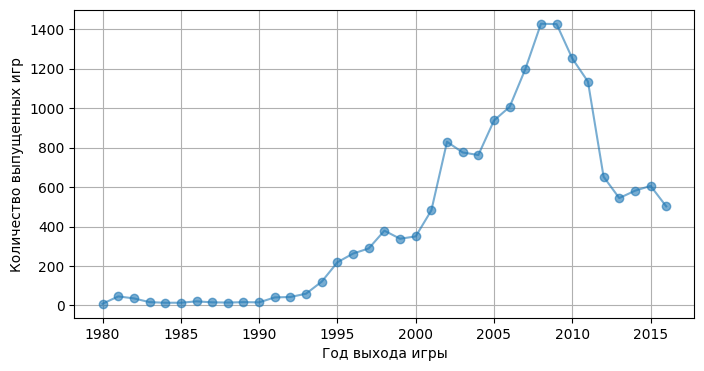

In [60]:
#график зависимости кол-ва выпущенных игр от года выпуска

year_of_release_count = (
    data
.pivot_table (index = 'year_of_release', values = 'name', aggfunc = 'count')
.plot(style= 'o-',grid= True, alpha= 0.6, figsize=(8,4), legend=None, xlabel='Год выхода игры',ylabel='Количество выпущенных игр')
)


***По данной диаграмме мы видим, что рост количества игр начинается с 2000 года, а пик пришелся на 2008-2009 года, после идет резкий спад.***

In [61]:
#посмотрим кол-во игр, выпущенных на каждой платформе

plarform_count = (data
                  .pivot_table (index = 'platform', values = 'name', aggfunc = 'count')
                  .reset_index(drop=False).sort_values(by='name', ascending=False)
)
plarform_count.columns = ['Название платформы','Общее количество игр']
plarform_count

,Название платформы,Общее количество игр
16,PS2,2126
4,DS,2119
17,PS3,1305
26,Wii,1284
28,X360,1232
19,PSP,1193
15,PS,1190
13,PC,954
6,GBA,811
29,XB,803


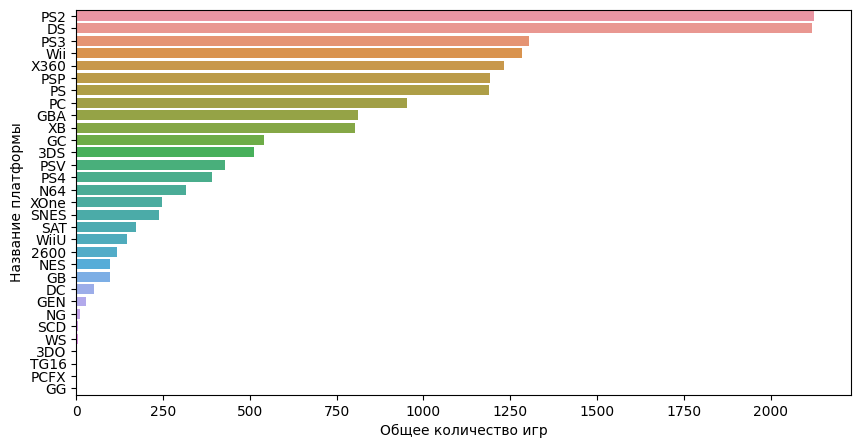

In [62]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.barplot (data=plarform_count, x='Общее количество игр', y= 'Название платформы', ax=ax);

***По данной таблице и графику, мы видим, что больше всего игр выпускались на 7 платформах: `PS2, DS, PS3, Wii, X360, PSP, PS`.*** 

In [63]:
platform_sales = (data
    .pivot_table (index='platform', values = 'global_sales', aggfunc = 'sum')
    .reset_index(drop=False).sort_values(by='global_sales', ascending=False)
)
platform_sales.columns = ['Название платформы','Суммарные продажи']
platform_sales

,Название платформы,Суммарные продажи
16,PS2,1233.32
28,X360,961.24
17,PS3,931.33
26,Wii,890.52
4,DS,802.13
15,PS,727.58
18,PS4,314.14
6,GBA,312.88
19,PSP,289.53
2,3DS,257.81


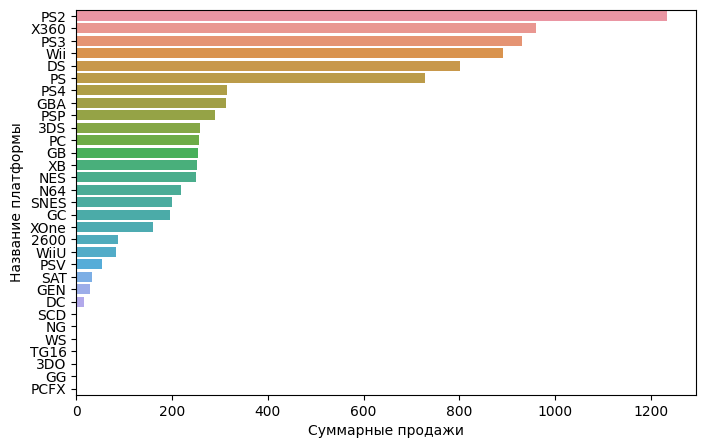

In [64]:
fig, ax = plt.subplots(figsize=(8, 5))

sns.barplot (data=platform_sales, x='Суммарные продажи', y= 'Название платформы', ax=ax);

***Анализируя текущие данные, мы видим, что больше всего суммарных продаж по всему миру получили 6 платформ: `PS2, X360, PS3, Wii, DS, PS`.***

Хотя, платформа `PSP` выпустила `1193 игры`, ***суммарная сумма продаж*** составила `289.53 миллионов` и находится на `9 месте среди всех продаж`.

In [65]:
#проверяем рандомную платформу, чтобы выяснить , действительно ли она собрала так мало продаж

data.query('platform == "PCFX"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,global_sales
14634,Blue Breaker: Ken Yorimo Hohoemi o,PCFX,1996,Role-Playing,0.00,0.00,0.03,0.00,NaN,NaN,Unknown,0.03


In [66]:
#посмотрим, сколько игр выпускалось на платформе по годам

plarform_count = (data
                  .query('platform == "PS2"')
                  .pivot_table (index = ['year_of_release','platform'], values = 'name', aggfunc = 'count')
                  .reset_index(drop=False).sort_values(by='name', ascending=False)
)
plarform_count

,year_of_release,platform,name
2,2002,PS2,280
4,2004,PS2,259
5,2005,PS2,259
6,2006,PS2,259
3,2003,PS2,256
7,2007,PS2,214
8,2008,PS2,191
1,2001,PS2,185
9,2009,PS2,96
0,2000,PS2,82


***Построим графики и посмотрим, сколько в среднем "живет" платформа на примере PS2, Wii, PC***

In [67]:
#создаем таблицу, где показано, сколько заработала платформа по годам

PS2 = (data
      .query('platform == "PS2"')
      .pivot_table(index = 'platform', columns = 'year_of_release', values = 'global_sales', aggfunc = 'sum')
      .reset_index()
)
PS2


year_of_release,platform,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,PS2,39.17,166.43,205.38,184.31,211.81,160.42,103.42,75.99,53.90,26.40,5.64,0.45


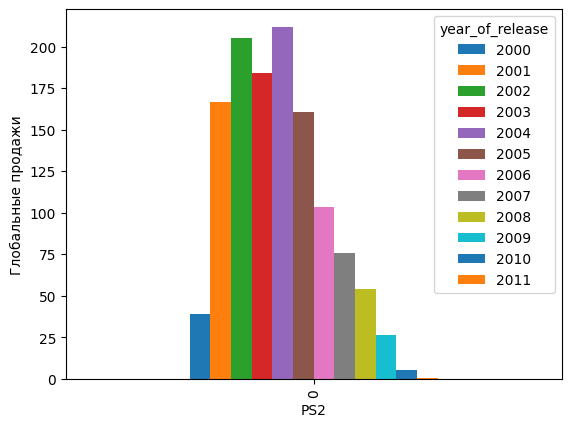

In [68]:
#проверим данные распределения на графике

PS2.plot(kind='bar', ylabel='Глобальные продажи', xlabel= 'PS2');

In [69]:
Wii = (data
      .query('platform == "Wii"')
      .pivot_table(index = 'platform', columns = 'year_of_release', values = 'global_sales', aggfunc = 'sum')
      .reset_index()
)
Wii

year_of_release,platform,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Wii,137.15,152.77,171.32,206.97,127.29,59.65,21.71,8.59,3.75,1.14,0.18


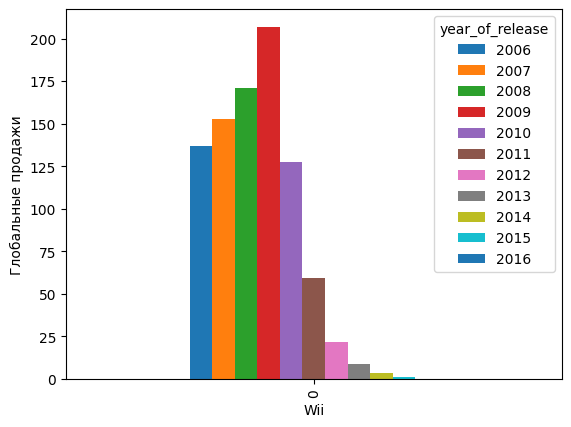

In [70]:
Wii.plot(kind='bar', ylabel='Глобальные продажи', xlabel= 'Wii');

In [71]:
PC = (data
      .query('platform == "PC"')
      .pivot_table(index = 'platform', columns = 'year_of_release', values = 'global_sales', aggfunc = 'sum')
      .reset_index()
)
PC

year_of_release,platform,1985,1988,1992,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,PC,0.04,0.03,3.03,12.87,4.22,10.58,11.27,3.26,4.74,4.66,5.47,8.57,8.84,10.39,4.37,2.85,9.28,12.42,16.91,24.19,34.99,23.22,12.38,13.28,8.52,5.25


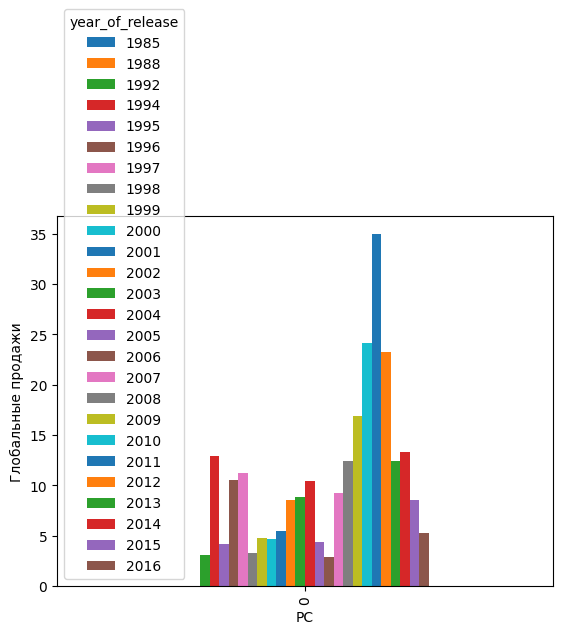

In [72]:
PC.plot(kind='bar', ylabel='Глобальные продажи', xlabel= 'PC');

In [73]:
data.query('platform == "PS2" and year_of_release == 2011')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,global_sales
9382,MLB 11: The Show,PS2,2011,Sports,0.06,0.05,0.00,0.02,NaN,6.20,E,0.13
10124,WWE All Stars,PS2,2011,Fighting,0.05,0.04,0.00,0.01,NaN,3.40,T,0.10
11237,FIFA 12,PS2,2011,Sports,0.00,0.02,0.00,0.06,NaN,NaN,Unknown,0.08
12525,Pro Evolution Soccer 2012,PS2,2011,Action,0.00,0.00,0.06,0.00,NaN,8.20,E,0.06
13241,Major League Baseball 2K11,PS2,2011,Sports,0.02,0.02,0.00,0.01,NaN,NaN,E,0.05
15378,Moujuutsukai to Oujisama: Snow Bride,PS2,2011,Adventure,0.00,0.00,0.02,0.00,NaN,NaN,Unknown,0.02
16151,Sangoku Koi Senki: Otome no Heihou!,PS2,2011,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,Unknown,0.01


In [74]:
#создаем таблицу для основных платформ и их выручка по годам

good_platform_6 = (data
      .query('platform == ["PS2","X360", "PS3", "Wii", "DS", "PS"]')
      .pivot_table(index = ['platform','year_of_release'], values = 'global_sales', aggfunc = 'sum')
      .reset_index()
)
good_platform_6.columns = ['Название платформы','Год релиза', 'global_sales']
good_platform_6

,Название платформы,Год релиза,global_sales
0,DS,1985,0.02
1,DS,2004,17.27
2,DS,2005,130.14
3,DS,2006,119.81
4,DS,2007,146.94
...,...,...,...
62,X360,2012,99.74
63,X360,2013,88.58
64,X360,2014,34.74
65,X360,2015,11.96


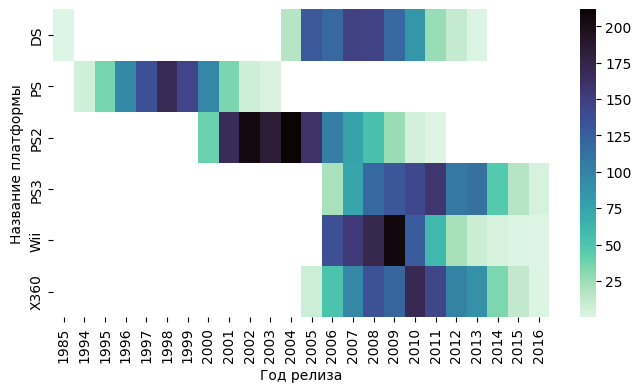

In [75]:
#создаем тепловую карту по 6 платформам

f, ax = plt.subplots(figsize=(8, 4))

heatmap1_data = pd.pivot_table(good_platform_6, values='global_sales', 
 index='Название платформы', 
 columns='Год релиза')

sns.heatmap(heatmap1_data, cmap="mako_r");

In [76]:
#создаем таблицу со всеми платформами

good_platform = (data
      .pivot_table(index = ['platform','year_of_release'], values = 'global_sales', aggfunc = 'sum')
      .reset_index()
)
good_platform.columns = ['Название платформы','Год релиза', 'global_sales']

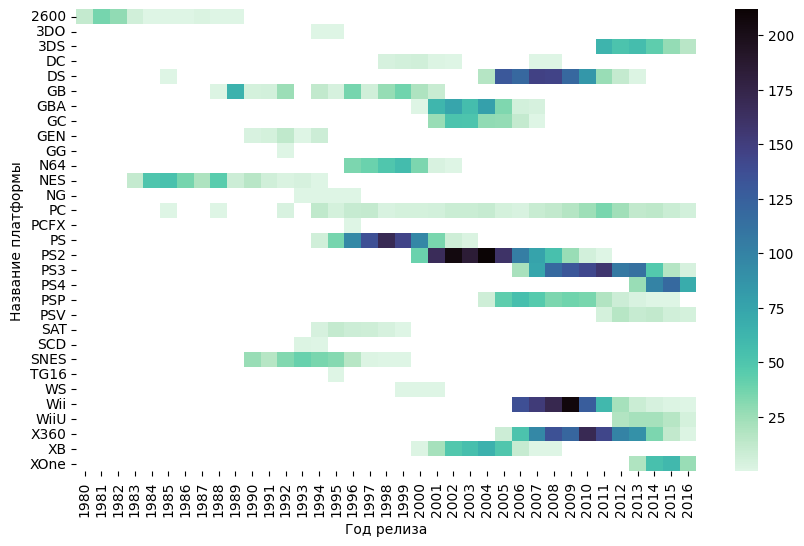

In [77]:
#создаем тепловую карту по всем платформам

f, ax = plt.subplots(figsize=(10, 6))

heatmap1_data = pd.pivot_table(good_platform, values='global_sales', 
 index='Название платформы', 
 columns='Год релиза')

sns.heatmap(heatmap1_data, cmap="mako_r");

***Учитывая данные выше, можно сделать вывод, что средний срок "жизни" платформы составляет - 4-5 лет.***

***Рассмотрим выбор актуальных данных для кампании на 2017 год:***

In [78]:
'Корреляция суммы продаж от года выхода игры составляет: {:.2}'.format(data['global_sales'].corr(data['year_of_release']))

'Корреляция суммы продаж от года выхода игры составляет: -0.076'

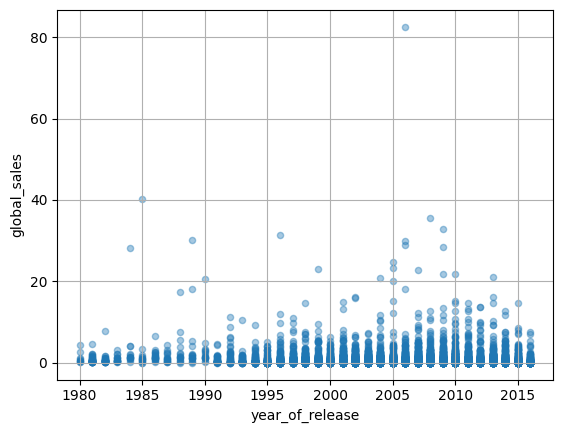

In [79]:
#посмотри зависимость дохода по всему миру от даты выхода игры 

data.plot(
kind='scatter',
y='global_sales',
x= 'year_of_release',
alpha= 0.4, 
grid=True,
legend= True);

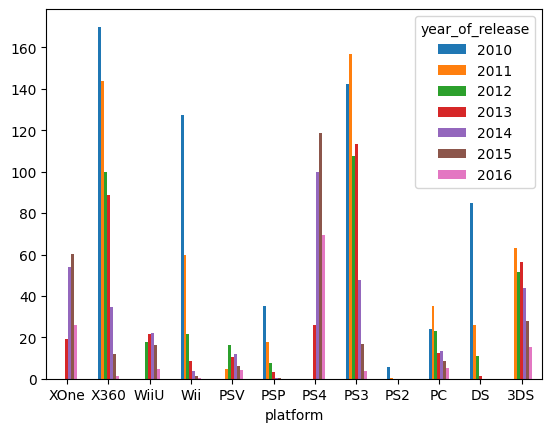

In [80]:
#построение графика для всех платформ с продажами с 2010 по 2016г

actual_platform = (data
      .query('year_of_release >= 2010')
      .pivot_table(index = 'platform', columns = 'year_of_release', values = 'global_sales', aggfunc = 'sum')
      .sort_values(by='platform', ascending=False)            
      .reset_index()
      .plot.bar(x='platform', rot=0)
);
plt.show()

In [81]:
#проверим кол-во игр, выпускащихся на платформах с 2010 по 2016 г. и с 2013 по 2016 г.

game_count_1 = (data
                  .query('year_of_release >= 2010')
                  .pivot_table (index = 'platform', values = 'name', aggfunc = 'count')
                  .reset_index(drop=False).sort_values(by='name', ascending=False)
                  
);
game_count_1.columns = ['Название платформы', 'Количество игр']
display (game_count_1)

game_count_2 = (data
                  .query('year_of_release >= 2013')
                  .pivot_table (index = 'platform', values = 'name', aggfunc = 'count')
                  .reset_index(drop=False).sort_values(by='name', ascending=False)
                  
);
game_count_2.columns = ['Название платформы', 'Количество игр']

display (game_count_2)

,Название платформы,Количество игр
4,PS3,888
10,X360,680
0,3DS,512
1,DS,506
6,PSP,500
2,PC,476
8,Wii,448
7,PSV,429
5,PS4,392
11,XOne,247


,Название платформы,Количество игр
4,PS4,392
6,PSV,358
3,PS3,345
0,3DS,303
10,XOne,247
2,PC,189
9,X360,186
8,WiiU,115
5,PSP,67
7,Wii,23


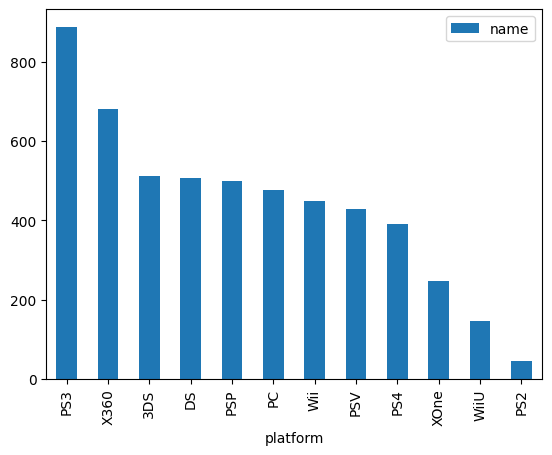

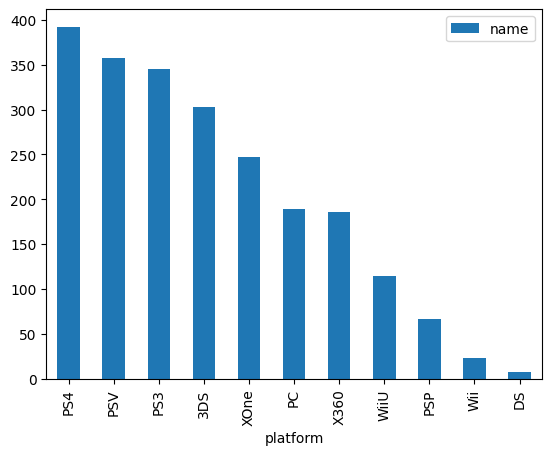

In [82]:
#построим диаграммы по данным из верхних таблиц (2010 по 2016 г. и с 2013 по 2016 г.)

game_count_1 = (data
                  .query('year_of_release >= 2010')
                  .pivot_table (index = 'platform', values = 'name', aggfunc = 'count')
                  .reset_index(drop=False).sort_values(by='name', ascending=False)
                  .plot.bar(x='platform', rot=90)

);
plt.show()

game_count_2 = (data
                  .query('year_of_release >= 2013')
                  .pivot_table (index = 'platform', values = 'name', aggfunc = 'count')
                  .reset_index(drop=False).sort_values(by='name', ascending=False)
                  .plot.bar(x='platform', rot=90)

);
plt.show()

`Топ-5` распределения платформ по количеству выпущенных игр `с 2010 по 2016 г.`:
1. PS3
2. X360
3. 3DS
4. DS
5. PSP

`Топ-5` распределения платформ по количеству выпущенных игр `с 2013 по 2016 г.`:
1. PS4
2. PSV
3. PS3
4. 3DS
5. XOne

***Возьмем актуальный период данных: 2013-2016 г.***

***Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.***

In [83]:
#делаем таблицу актуальных данных по всем платформам, которые выпускали игры после с 2013г.

actual_platform = (data
      .query('year_of_release >= 2013')
      .pivot_table(index = 'platform', columns = 'year_of_release', values = 'global_sales', aggfunc = 'sum')
      .sort_values(by='platform', ascending=False)            
      .reset_index()
)
actual_platform

year_of_release,platform,2013,2014,2015,2016
0,XOne,18.96,54.07,60.14,26.15
1,X360,88.58,34.74,11.96,1.52
2,WiiU,21.65,22.03,16.35,4.60
3,Wii,8.59,3.75,1.14,0.18
4,PSV,10.59,11.90,6.25,4.25
5,PSP,3.14,0.24,0.12,NaN
6,PS4,25.99,100.00,118.90,69.25
7,PS3,113.25,47.76,16.82,3.60
8,PC,12.38,13.28,8.52,5.25
9,DS,1.54,NaN,NaN,NaN


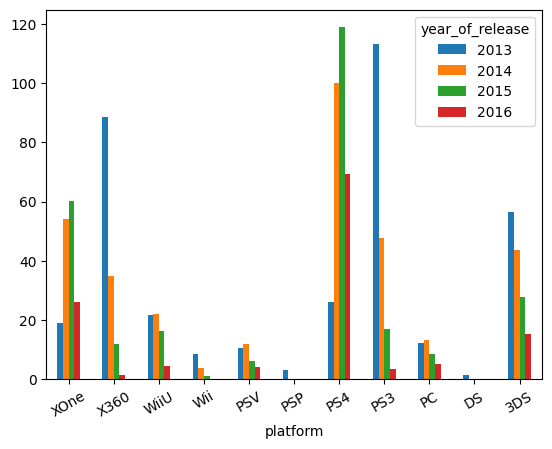

In [84]:
#строим график для наглядности

ax = actual_platform.plot.bar(x='platform', rot=30)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

***Построив сводную таблицу и по ней график***, мы видим, что с `2013 по 2016 год` продажи были только у `11 платформ`: ***XOne,
X360, WiiU, Wii, PSV, PSP, PS4, PS3, PC, DS, 3DS***.

Больше всего продаж у 5 платформ `3DS, PS4, PS3, XOne, X360`.
Теперь `рассмотрим` каждую платформу подробнее.

In [85]:
#делаем таблицу актуальных данных по 5 платформам, которые выпускали игры после с 2013г.

actual_platform = (data
      .query('year_of_release >= 2013 and platform == ["3DS", "PS3", "PS4", "X360", "XOne"]')
      .pivot_table(index = 'platform', columns = 'year_of_release', values = 'global_sales', aggfunc = 'sum')
      .sort_values(by='platform', ascending=False)            
      .reset_index()
)
actual_platform

year_of_release,platform,2013,2014,2015,2016
0,XOne,18.96,54.07,60.14,26.15
1,X360,88.58,34.74,11.96,1.52
2,PS4,25.99,100.00,118.90,69.25
3,PS3,113.25,47.76,16.82,3.60
4,3DS,56.57,43.76,27.78,15.14


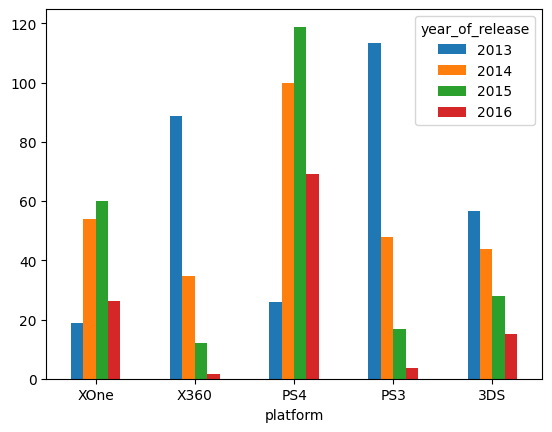

In [86]:
actual_platform_box = (data
      .query('year_of_release >= 2013 and platform == ["3DS", "PS3", "PS4", "X360", "XOne"]')
      .pivot_table(index = 'platform', columns = 'year_of_release', values = 'global_sales', aggfunc = 'sum')
      .sort_values(by='platform', ascending=False)            
      .reset_index()
      .plot.bar(x='platform', rot=0)
);
plt.show()

In [87]:
#общие продажи по годам и платформам топ-5

top = (data
                  .query('year_of_release >= 2015 and platform == ["3DS", "PS3", "PS4", "X360", "XOne"]')
                  .pivot_table (index = 'platform', values = 'global_sales', aggfunc = 'sum')
                  .reset_index(drop=False).sort_values(by='global_sales', ascending=False)
                  
);
top.columns = ['Название платформы', 'Сумма продаж']
display (top)


top_5 = (data
                  .query('year_of_release >= 2013 and platform == ["3DS", "PS3", "PS4", "X360", "XOne"]')
                  .pivot_table (index = 'platform', values = 'global_sales', aggfunc = 'sum')
                  .reset_index(drop=False).sort_values(by='global_sales', ascending=False)
                  
);
top_5.columns = ['Название платформы', 'Сумма продаж']
display (top_5)

,Название платформы,Сумма продаж
2,PS4,188.15
4,XOne,86.29
0,3DS,42.92
1,PS3,20.42
3,X360,13.48


,Название платформы,Сумма продаж
2,PS4,314.14
1,PS3,181.43
4,XOne,159.32
0,3DS,143.25
3,X360,136.80


Разберем данные по каждой из 5 платформ:
1. ***XOne***. `Лучшие продажи` у данной платформы были `в 2015 году`, немного меньше была выручка за 2014 год. А `в 2016 - продажи значительно упали по сравнению с 2015 г.`, примерно в 2 раза.
Из чего мы можем сделать вывод, что `продажи падают`.


2. ***X360***. `Основные продажи пришлись на 2013 год`. С каждым годом, уровень продаж по всему миру `снижается`.


3. ***PS4*** в `2015 г. значительно обогнала всех своих конкурентов` по продажам и в `2016 г. не сдает своих позиций`.
Но продажи также `уменьшаются`.


4. ***PS3***. По данной платформе можно уверенно сказать, что `с 2013 года продажи стремительно падают`.


5. ***3DS***. Продажи по данной платформе, как и в предыдущем случае `падают, но равномерно`, однако, на данной платформе `выпускается достаточно много игр`.

***Наиболее прибыльные платформы за 2015-2016 г. - PS4, XOne, 3DS***

***Построение графика «ящик с усами» по глобальным продажам игр в разбивке по платформам. Описание результата.***

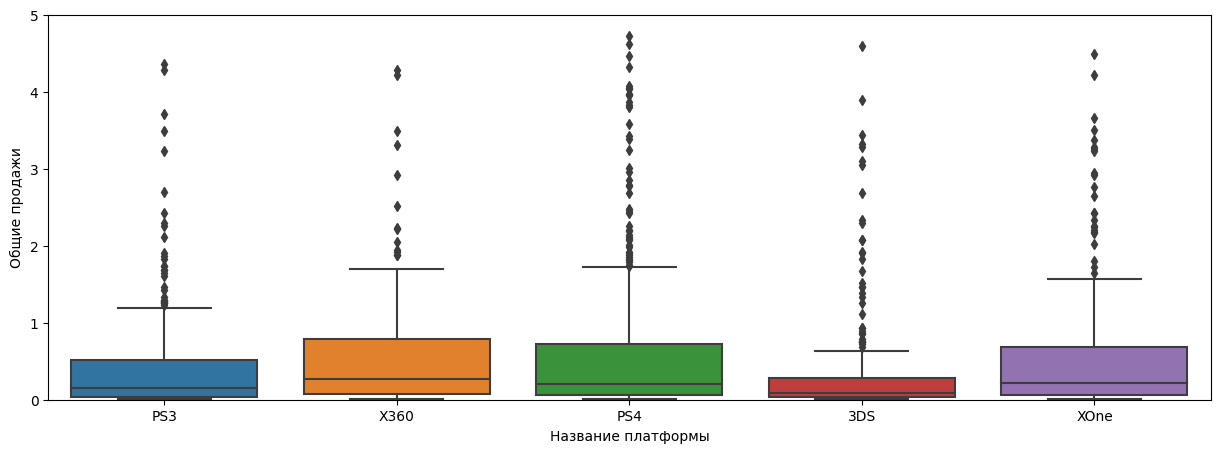

In [88]:
top = data.query('year_of_release >= 2013 and platform == ["3DS", "PS3", "PS4", "X360", "XOne"]')
plt.figure(figsize=(15,5))
sns.boxplot(data = top, x = "platform", y = "global_sales").set(xlabel='Название платформы',\
                                                                ylabel = 'Общие продажи', ylim=(0,5));
   


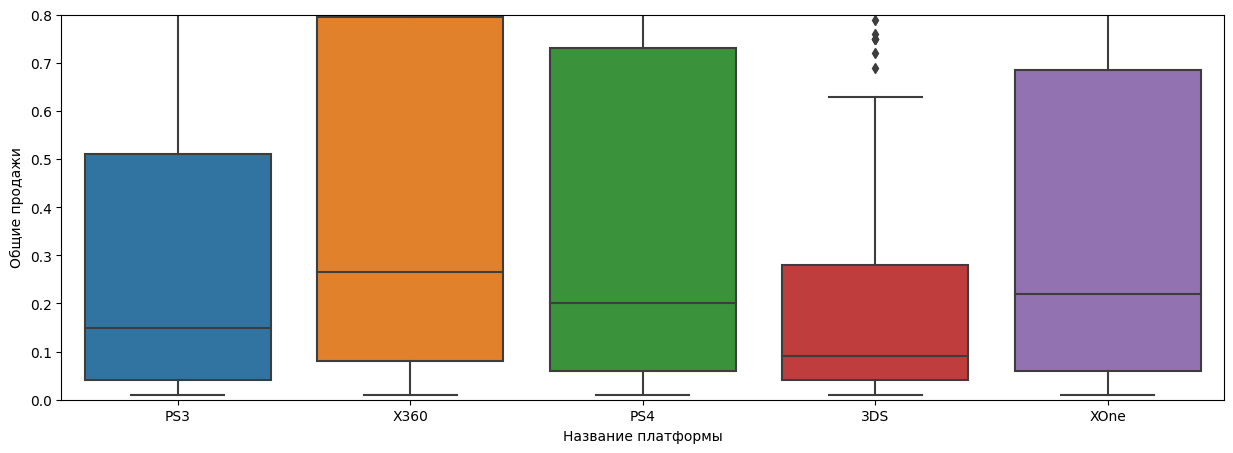

In [89]:
top = data.query('year_of_release >= 2013 and platform == ["3DS", "PS3", "PS4", "X360", "XOne"]')
plt.figure(figsize=(15,5))
sns.boxplot(data = top, x = "platform", y = "global_sales").set(xlabel='Название платформы',\
                                                                ylabel = 'Общие продажи', ylim=(0,0.8));

In [90]:
platform_3DS = data.query('year_of_release >= 2013 and platform == "3DS"')
platform_3DS['global_sales'].describe()


count   303.00
mean      0.47
std       1.38
min       0.01
25%       0.04
50%       0.09
75%       0.28
max      14.60
Name: global_sales, dtype: float64

**По данной диаграмме размаха мы видим, что больше всего продаж в пределах "ящика" у 3-х платформ: X360, PS4, XOne.**
Также, мы видим большое кол-во аномально-высоких продаж у всех платформ.

Но наиболее актуальными будут эти 3 платформы для создания кампании на 2017 год.

***Влияние отзывов критиков и пользователей на продажи внутри одной платформы.
Построение диаграммы рассеяния и подсчет корреляции между отзывами и продажами.***

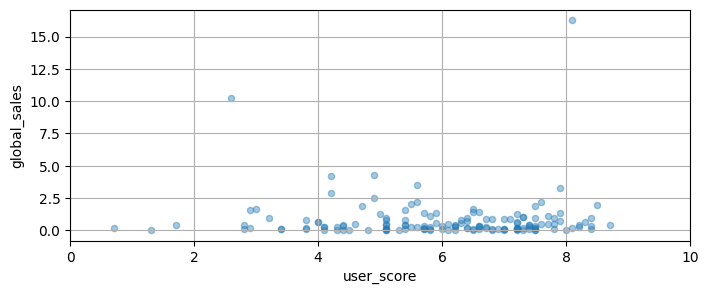

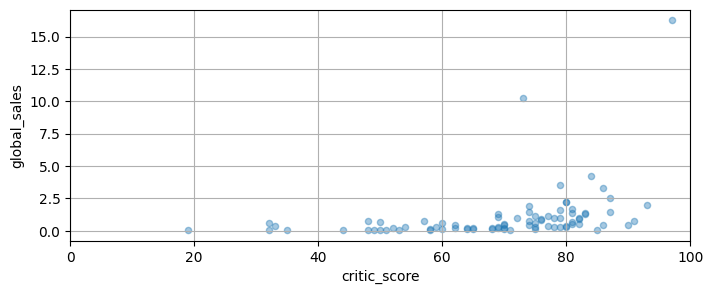

In [91]:
#диаграмма рассеивания для платформы 3DS и отзывов пользователей и критиков

user_X360 = data.query('year_of_release >= 2013 and platform == "X360"')

user_X360.plot(
kind='scatter',
y='global_sales',
x= 'user_score',
alpha= 0.4, 
grid=True,
legend= True,
xlim = (0,10),
figsize=(8,3));


user_X360.plot(
kind='scatter',
y='global_sales',
x= 'critic_score',
alpha= 0.4, 
grid=True,
legend= True,
xlim = (0,100),
figsize=(8,3));


In [92]:
display ('Корреляция продаж от отзывов пользователей составляет: {:.2}'.format(user_X360['global_sales'].\
                                                                               corr(user_X360['user_score'])))
display ('Корреляция продаж от отзывов критиков составляет: {:.2}'.format(user_X360['global_sales'].\
                                                                          corr(user_X360['critic_score'])))


'Корреляция продаж от отзывов пользователей составляет: -0.012'

'Корреляция продаж от отзывов критиков составляет: 0.35'

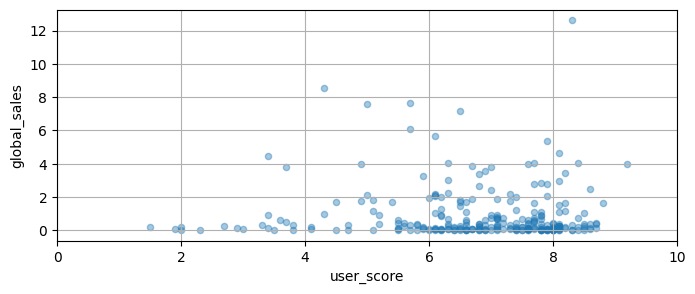

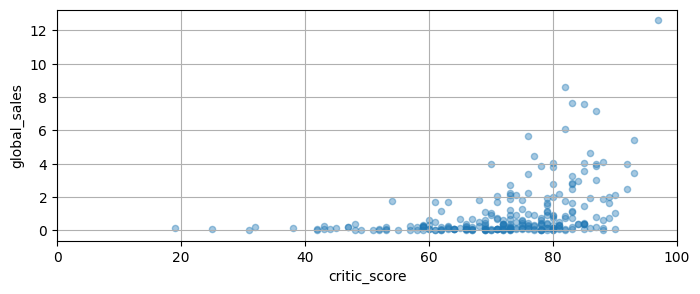

In [93]:
#диаграмма рассеивания для платформы PS4 и отзывов пользователей и критиков

user_PS4 = data.query('year_of_release >= 2013 and platform == "PS4"')

user_PS4.plot(
kind='scatter',
y='global_sales',
x= 'user_score',
alpha= 0.4, 
grid=True,
legend= True,
xlim = (0,10),
figsize=(8,3));


user_PS4.plot(
kind='scatter',
y='global_sales',
x= 'critic_score',
alpha= 0.4, 
grid=True,
legend= True,
xlim = (0,100),
figsize=(8,3));


In [94]:
display ('Корреляция продаж от отзывов пользователей составляет: {:.2}'.format(user_PS4['global_sales'].\
                                                                               corr(user_PS4['user_score'])))
display ('Корреляция продаж от отзывов критиков составляет: {:.2}'.format(user_PS4['global_sales'].\
                                                                          corr(user_PS4['critic_score'])))


'Корреляция продаж от отзывов пользователей составляет: -0.032'

'Корреляция продаж от отзывов критиков составляет: 0.41'

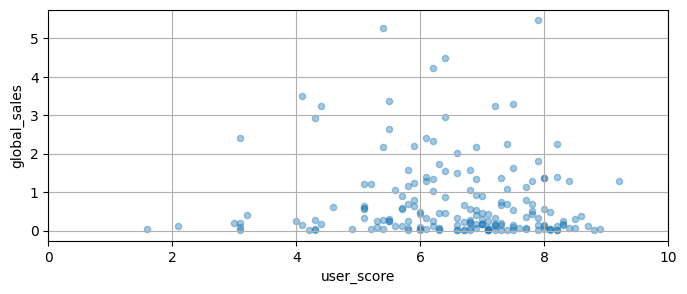

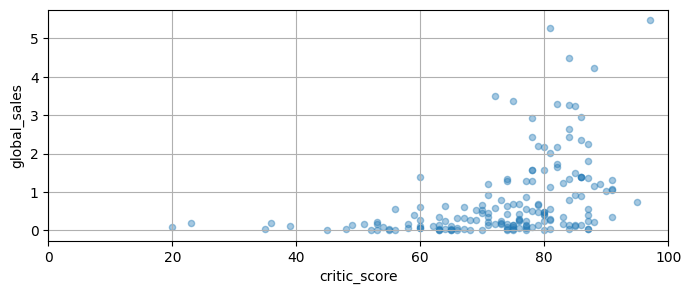

In [95]:
#диаграмма рассеивания для платформы 3DS и отзывов пользователей и критиков

user_XOne = data.query('year_of_release >= 2013 and platform == "XOne"')

user_XOne.plot(
kind='scatter',
y='global_sales',
x= 'user_score',
alpha= 0.4, 
grid=True,
legend= True,
xlim = (0,10),
figsize=(8,3));


user_XOne.plot(
kind='scatter',
y='global_sales',
x= 'critic_score',
alpha= 0.4, 
grid=True,
legend= True,
xlim = (0,100),
figsize=(8,3));

In [96]:
display ('Корреляция продаж от отзывов пользователей составляет: {:.2}'.format(user_XOne['global_sales'].\
                                                                               corr(user_XOne['user_score'])))
display ('Корреляция продаж от отзывов критиков составляет: {:.2}'.format(user_XOne['global_sales'].\
                                                                          corr(user_XOne['critic_score'])))


'Корреляция продаж от отзывов пользователей составляет: -0.069'

'Корреляция продаж от отзывов критиков составляет: 0.42'

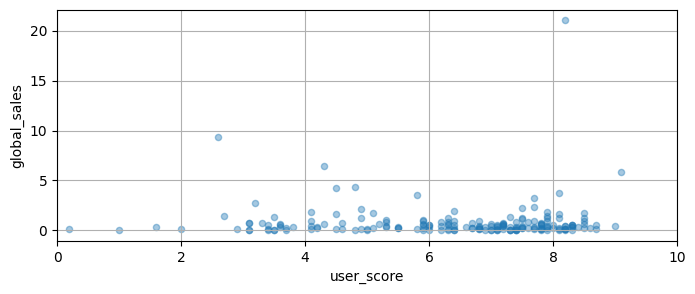

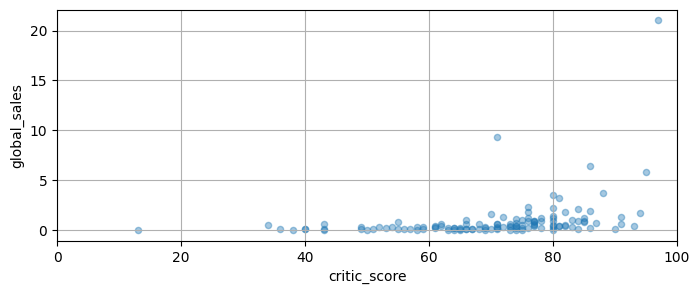

In [97]:
#диаграмма рассеивания для платформы PS3 и отзывов пользователей и критиков

user_PS3 = data.query('year_of_release >= 2013 and platform == "PS3"')

user_PS3.plot(
kind='scatter',
y='global_sales',
x= 'user_score',
alpha= 0.4, 
grid=True,
legend= True,
xlim = (0,10),
figsize=(8,3));


user_PS3.plot(
kind='scatter',
y='global_sales',
x= 'critic_score',
alpha= 0.4, 
grid=True,
legend= True,
xlim = (0,100),
figsize=(8,3));

In [98]:
display ('Корреляция продаж от отзывов пользователей составляет: {:.2}'.format(user_PS3['global_sales'].\
                                                                               corr(user_PS3['user_score'])))
display ('Корреляция продаж от отзывов критиков составляет: {:.2}'.format(user_PS3['global_sales'].\
                                                                          corr(user_PS3['critic_score'])))


'Корреляция продаж от отзывов пользователей составляет: 0.0024'

'Корреляция продаж от отзывов критиков составляет: 0.33'

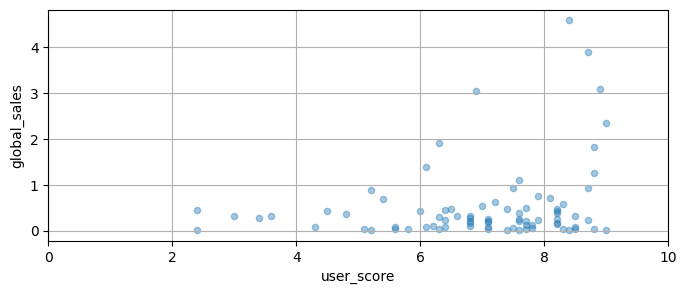

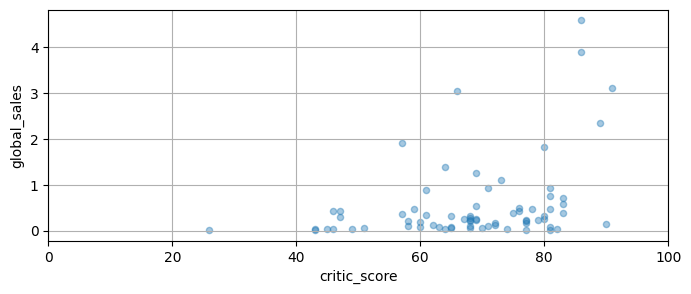

In [99]:
#диаграмма рассеивания для платформы PS3 и отзывов пользователей и критиков

user_3DS = data.query('year_of_release >= 2013 and platform == "3DS"')

user_3DS.plot(
kind='scatter',
y='global_sales',
x= 'user_score',
alpha= 0.4, 
grid=True,
legend= True,
xlim = (0,10),
figsize=(8,3));


user_3DS.plot(
kind='scatter',
y='global_sales',
x= 'critic_score',
alpha= 0.4, 
grid=True,
legend= True,
xlim = (0,100),
figsize=(8,3));

In [100]:
display ('Корреляция продаж от отзывов пользователей составляет: {:.2}'.format(user_3DS['global_sales'].\
                                                                               corr(user_3DS['user_score'])))
display ('Корреляция продаж от отзывов критиков составляет: {:.2}'.format(user_3DS['global_sales'].\
                                                                          corr(user_3DS['critic_score'])))


'Корреляция продаж от отзывов пользователей составляет: 0.24'

'Корреляция продаж от отзывов критиков составляет: 0.36'

**По диаграмме рассеивания и корреляции** мы видим:
Что `никакой взаимосвязи между глобальными продажами игр на нужных нам платформах и отзывами пользователей совсем нет`, она даже отрицательная.
Ситуация с корреляцией `между продажами и отзывами критиков значительно лучше` и составляет примерно `от 0.33 до 0.42`. 
Но эти данные `не дают нам точно сказать, что взаимосвязь устойчива`.

**Общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?***

In [101]:
#посмотрим кол-во игр по каждому жанру по всем годам в ДФ

game_genre_all = (data
                  .pivot_table (index = 'genre', values = 'name', aggfunc = 'count')
                  .reset_index(drop=False).sort_values(by='name', ascending=False)
                  
);
game_genre_all.columns = ['Жанр', 'Количество игр']
game_genre_all

,Жанр,Количество игр
0,Action,3306
10,Sports,2305
3,Misc,1716
7,Role-Playing,1481
8,Shooter,1296
1,Adventure,1291
6,Racing,1226
4,Platform,878
9,Simulation,857
2,Fighting,837


In [102]:
#посмотри кол-во игр по каждому жанру c 2013 по 2016 

game_genre = (data
                  .query('year_of_release >= 2013')
                  .pivot_table (index = 'genre', values = 'name', aggfunc = 'count')
                  .reset_index(drop=False).sort_values(by='name', ascending=False)
                  
);
game_genre.columns = ['Жанр', 'Количество игр']
game_genre

,Жанр,Количество игр
0,Action,766
7,Role-Playing,292
1,Adventure,245
10,Sports,214
8,Shooter,187
3,Misc,155
6,Racing,85
2,Fighting,80
4,Platform,74
9,Simulation,62


In [103]:
#посмотрим кол-во игр по каждому жанру c 2013 по 2016 на топ-5 платформах

game_genre_top_platform = (data
      .query('year_of_release >= 2013 and platform == ["3DS", "PS3", "PS4", "X360", "XOne"]')
      .pivot_table(index = 'genre', columns = 'platform', values = 'name', aggfunc = 'count')
      .sort_values(by='genre', ascending=False)           
      .reset_index()
);
game_genre_top_platform

platform,genre,3DS,PS3,PS4,X360,XOne
0,Strategy,11.00,4.00,6.00,1.00,3.00
1,Sports,8.00,47.00,46.00,31.00,38.00
2,Simulation,15.00,6.00,6.00,4.00,4.00
3,Shooter,1.00,31.00,41.00,34.00,38.00
4,Role-Playing,62.00,49.00,51.00,8.00,14.00
5,Racing,NaN,13.00,19.00,12.00,20.00
6,Puzzle,9.00,1.00,1.00,NaN,NaN
7,Platform,15.00,9.00,12.00,6.00,5.00
8,Misc,32.00,18.00,20.00,9.00,19.00
9,Fighting,7.00,24.00,18.00,7.00,7.00


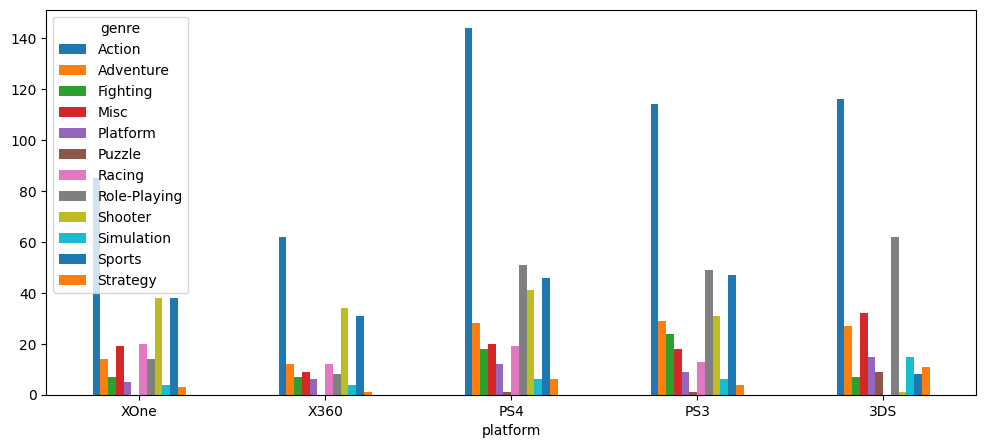

In [104]:
#посмотрим кол-во игр по каждому жанру c 2013 по 2016 на топ-5 платформах

game_genre_top_platform = (data
      .query('year_of_release >= 2013 and platform == ["3DS", "PS3", "PS4", "X360", "XOne"]')
      .pivot_table(index = 'platform', columns = 'genre', values = 'name', aggfunc = 'count')
      .sort_values(by='platform', ascending=False)            
      .reset_index()
      .plot.bar(x='platform', rot=0, figsize = (12,5), legend = 'upper right')
);
plt.show()



**Наибольшее количество игр в жанре `Экшн`.
Меньше всего - `Пазлы`.**

In [105]:
actual_platform_genre = (data
      .query('year_of_release >= 2013 and platform == ["3DS", "PS3", "PS4", "X360", "XOne"]')
      .pivot_table(index = 'platform', columns = 'genre', values = 'global_sales', aggfunc = 'sum')
      .sort_values(by='platform', ascending=False)            
      .reset_index()
);
actual_platform_genre

genre,platform,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
0,XOne,37.31,2.68,2.45,7.43,0.93,NaN,9.79,10.55,60.33,0.69,26.74,0.42
1,X360,47.59,1.92,2.55,12.49,2.14,NaN,3.07,4.43,35.48,0.89,25.96,0.28
2,PS4,96.10,6.34,8.65,8.19,7.69,0.02,12.14,28.99,88.56,1.23,55.61,0.62
3,PS3,70.92,4.32,6.05,8.36,3.33,0.04,6.46,16.49,31.79,0.71,32.35,0.61
4,3DS,34.04,3.33,8.21,7.10,8.79,1.73,NaN,67.37,0.06,9.53,1.82,1.27


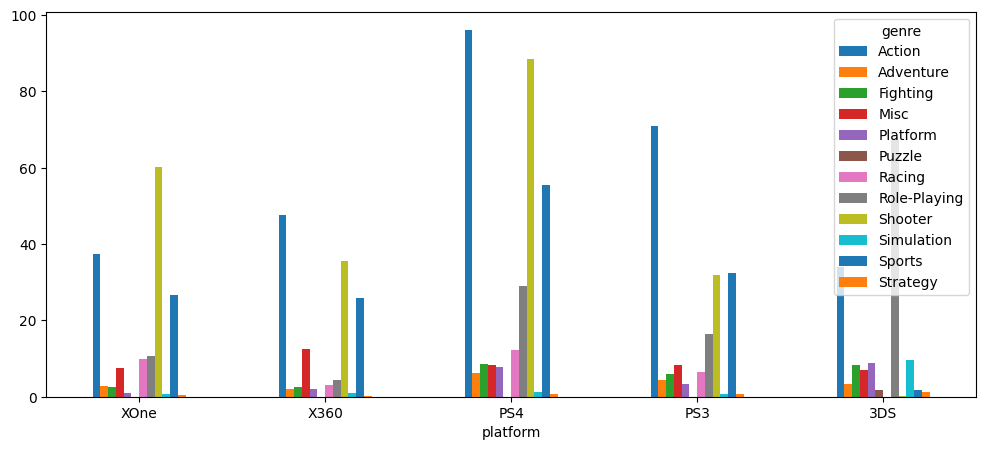

In [106]:
#рассмотрим диаграмму самых "дорогих игр" на платформах топ-5

actual_platform_genre = (data
      .query('year_of_release >= 2013 and platform == ["3DS", "PS3", "PS4", "X360", "XOne"]')
      .pivot_table(index = 'platform', columns = 'genre', values = 'global_sales', aggfunc = 'sum')
      .sort_values(by='platform', ascending=False)            
      .reset_index()
      .plot.bar(x='platform', rot=0, figsize = (12,5), legend = 'upper right'));
plt.show()

1. **XOne**. На данной платформе ***лидируют*** `игры в жанре "Шутер"`, ***меньше всего продаж*** приносят - `Стратегии`, игр в жанре `Паззлы` ***совсем нет***.


2. **X360**. На данной платформе ***лидируют*** `игры в жанре "Экшн"`, ***меньше всего продаж*** приносят - `Стратегии`, игр в жанре `Паззлы` ***совсем нет***.


3. **PS4**. На данной платформе ***лидируют*** `игры в жанре "Экшн"`, ***меньше всего продаж*** приносят - `Паззлы`.


4. **PS3**. На данной платформе ***лидируют*** `игры в жанре "Экшн"`, ***меньше всего продаж*** приносят - `Паззлы`.


5. **3DS**. На данной платформе ***лидируют*** `игры в жанре "Ролевые игры"`, ***меньше всего продаж*** приносят - `Шутеры`,игр в жанре `Гонки` ***совсем нет***.

In [107]:
actual_platform_genre = (data
      .query('year_of_release >= 2013 and platform == ["3DS", "PS3", "PS4", "X360", "XOne"]')
      .pivot_table(index = 'platform', columns = 'genre', values = 'global_sales', aggfunc = 'median')
      .sort_values(by='platform', ascending=False)            
      .reset_index()
);
actual_platform_genre

genre,platform,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
0,XOne,0.15,0.06,0.20,0.18,0.16,NaN,0.18,0.32,1.10,0.16,0.33,0.17
1,X360,0.25,0.07,0.22,0.31,0.11,NaN,0.20,0.49,0.36,0.22,0.43,0.28
2,PS4,0.15,0.07,0.17,0.07,0.30,0.02,0.23,0.20,0.97,0.21,0.53,0.08
3,PS3,0.17,0.05,0.13,0.11,0.25,0.04,0.12,0.12,0.41,0.08,0.26,0.13
4,3DS,0.07,0.06,0.08,0.08,0.24,0.10,NaN,0.17,0.06,0.06,0.18,0.06


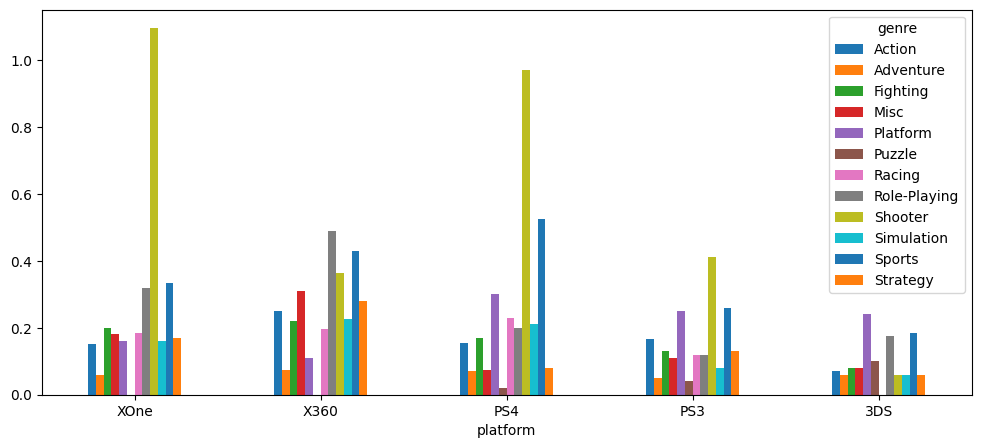

In [108]:
#рассмотрим диаграмму самых "дорогих игр" (по медиане) на платформах топ-5

actual_platform_genre = (data
      .query('year_of_release >= 2013 and platform == ["3DS", "PS3", "PS4", "X360", "XOne"]')
      .pivot_table(index = 'platform', columns = 'genre', values = 'global_sales', aggfunc = 'median')
      .sort_values(by='platform', ascending=False)            
      .reset_index()
      .plot.bar(x='platform', rot=0, figsize = (12,5), legend = 'upper right'));
plt.show()

1. **XOne**. На данной платформе ***лидируют*** `игры в жанре "Шутер"`, ***меньше всего продаж*** приносят - `Приключения`, игр в жанре `Паззлы` ***совсем нет***.


2. **X360**. На данной платформе ***лидируют*** `игры в жанре "Ролевые игры"`, ***меньше всего продаж*** приносят - `Приключения`, игр в жанре `Паззлы` ***совсем нет***.


3. **PS4**. На данной платформе ***лидируют*** `игры в жанре "Шутер"`, ***меньше всего продаж*** приносят - `Паззлы`.


4. **PS3**. На данной платформе ***лидируют*** `игры в жанре "Шутер"`, ***меньше всего продаж*** приносят - `Паззлы и Приключения`.


5. **3DS**. На данной платформе ***лидируют*** `игры в жанре "Платформер"`, ***меньше всего продаж*** приносят - `Приключения, Шутеры, Симуляторы и Стратегии`,игр в жанре `Гонки` ***совсем нет***.

Изначально мы взяли сумму всех глобальных продаж каждого жанра на топ-5 платформах. Получилось, что больше всего `продаются жанры Экшн`.

После проверили данные по медианному значению глобальных продаж каждого жанра на топ-5 платформ. И получилось, что данные `совсем другие` и `самые продаваемые игры на 3 из 5 платформах - Шутеры`.

Именно 2 исследование будем считать корректным.

## Портрет пользователя каждого региона


In [109]:
data.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,global_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.00,8.00,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.00,8.30,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.00,8.00,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Unknown,31.38


**Самые популярные платформы (топ-5) для каждого региона (NA, EU, JP).**

In [110]:
#посмотрим топ-5 платформ продаж в Северной Америке(по продажам)

na_sales_top_5 = (data
    .query('year_of_release >= 2013')
    .pivot_table (index='platform', values = 'na_sales', aggfunc = 'sum')
    .reset_index(drop=False).sort_values(by='na_sales', ascending=False)
    .head(5)
)
na_sales_top_5.columns = ['Название платформы','Количество игр']
na_sales_top_5

,Название платформы,Количество игр
4,PS4,108.74
10,XOne,93.12
9,X360,81.66
3,PS3,63.50
0,3DS,38.20


In [111]:
#посмотрим топ-5 платформ продаж в Европе(по продажам)

eu_sales_top_5 = (data
    .query('year_of_release >= 2013')
    .pivot_table (index='platform', values = 'eu_sales', aggfunc = 'sum')
    .reset_index(drop=False).sort_values(by='eu_sales', ascending=False)
    .head(5)
)
eu_sales_top_5.columns = ['Название платформы','Суммарные продажи']
eu_sales_top_5

,Название платформы,Суммарные продажи
4,PS4,141.09
3,PS3,67.81
10,XOne,51.59
9,X360,42.52
0,3DS,30.96


In [112]:
#посмотрим топ-5 платформ продаж в Японии(по продажам)

jp_sales_top_5 = (data
    .query('year_of_release >= 2013')
    .pivot_table (index='platform', values = 'jp_sales', aggfunc = 'sum')
    .reset_index(drop=False).sort_values(by='jp_sales', ascending=False)
    .head(5)
)
jp_sales_top_5.columns = ['Название платформы','Суммарные продажи']
jp_sales_top_5

,Название платформы,Суммарные продажи
0,3DS,67.81
3,PS3,23.35
6,PSV,18.59
4,PS4,15.96
8,WiiU,10.88


В данных мы видим распредление `топ-5 платформ` по продажам в разных странах.

В `Северной Америке`: PS4, XOne, X360, PS3, 3DS.

`Европа` : PS4, PS3, XOne, X360, 3DS. 

`Япония`: 3DS, PS3, PSV, PS4, WiiU.

В ***Северной Америке и Европе*** популярные платформы `одинаковые`, отличаются только местом в рейтинге, в то время, как в ***Японии*** совсем другие платформы в рейтинге, например, `PSV, WiiU`.

**Самые популярные жанры (топ-5)**


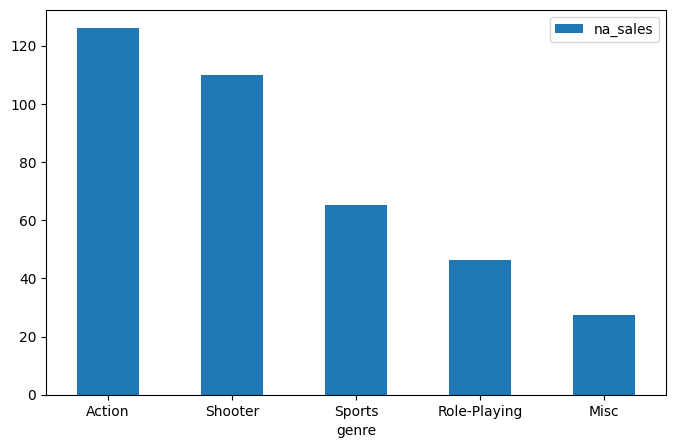

In [113]:
#посмотрим топ-5 жанров в Северной Америке

na_genre_top_5 = (data
    .query('year_of_release >= 2013')
    .pivot_table (index='genre', values = 'na_sales', aggfunc = 'sum')
    .reset_index(drop=False).sort_values(by='na_sales', ascending=False)
    .head(5)
    .plot.bar(x='genre', rot=0, figsize = (8,5))
);
na_genre_top_5.columns = ['Жанр','Суммарные продажи']
na_genre_top_5;

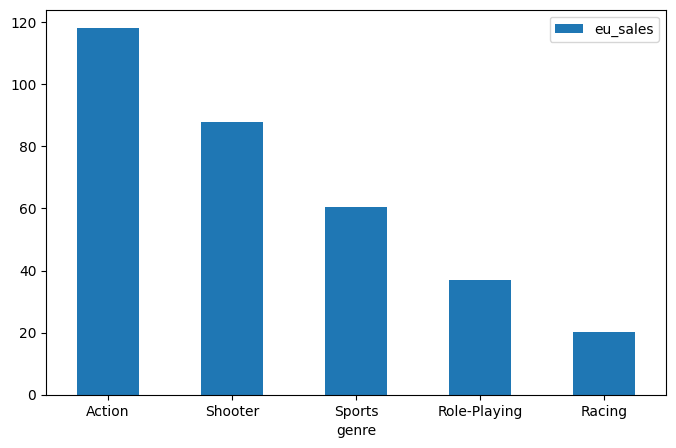

In [114]:
#посмотрим топ-5 жанров в Европе

eu_genre_top_5 = (data
    .query('year_of_release >= 2013')
    .pivot_table (index='genre', values = 'eu_sales', aggfunc = 'sum')
    .reset_index(drop=False).sort_values(by='eu_sales', ascending=False)
    .head(5)
    .plot.bar(x='genre', rot=0, figsize = (8,5))
)
eu_genre_top_5.columns = ['Жанр','Суммарные продажи']
eu_genre_top_5;

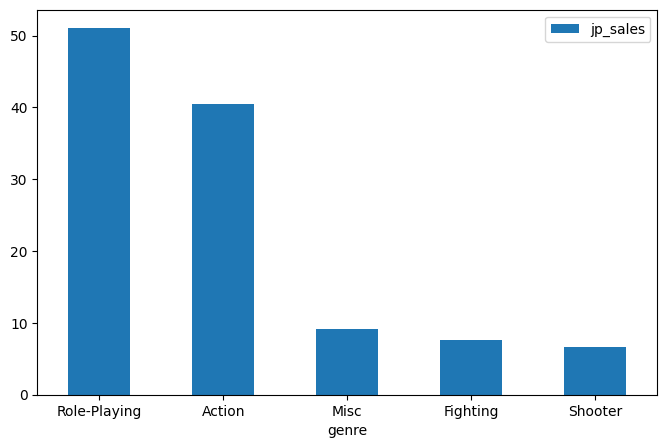

In [115]:
#посмотрим топ-5 жанров в Японии

jp_genre_top_5 = (data
    .query('year_of_release >= 2013')
    .pivot_table (index='genre', values = 'jp_sales', aggfunc = 'sum')
    .reset_index(drop=False).sort_values(by='jp_sales', ascending=False)
    .head(5)
    .plot.bar(x='genre', rot=0, figsize = (8,5))
);
jp_genre_top_5.columns = ['Жанр','Суммарные продажи']
jp_genre_top_5;

В `Северной Америке` лидирует `жанр Экшн`, замыкает топ-5 -`Misc (Онлайн-шутер)`.

В `Европе` также распределены `самые популярные жанры`, на 1 месте `Экшн`, а на 5 месте- `Гонки`.

В `Японии` совсем другое распределение топ-5. Например, на `1 месте- Ролевые игры`, на 3 месте - `Онлайн-шутер`, на 4- `Бои` и замыкает топ-5 - `Шутер`.


Можно заметить, что `во всех странах любят игры в жанре- Экшн и Шутеры`.

**Влияет ли рейтинг ESRB на продажи в отдельном регионе?**


**Расшифровка рейтинга игр:**

***М («Mature»)*** — «Для взрослых»: Материалы игры не подходят для лиц младше 17 лет

***E («Everyone»)***  — «Для всех»: Содержание вполне подходит для всех возрастов

***T («Teen»)*** — «Подросткам»: Игра подходит для лиц от 13 лет

***E10+ («Everyone 10 and older»)*** — «Для всех от 10 лет и старше»

***Unknown*** — рейтинг игры неизвестен


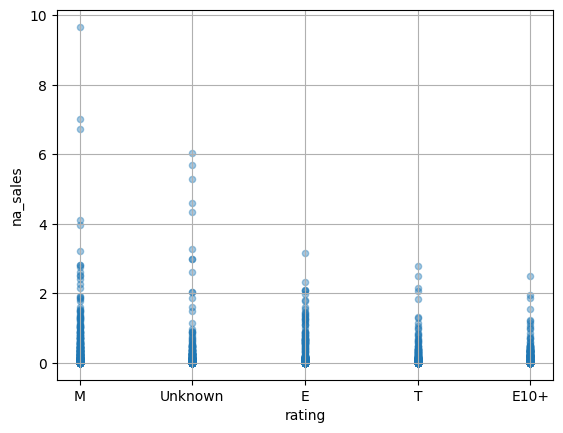

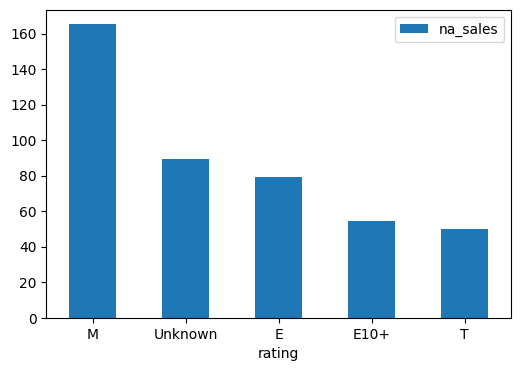

In [116]:
#смотрим на диаграмму рассеивания влияния рейтинга игр на продажи в регионе

na_sales_rating = data.query('year_of_release >= 2013')

na_sales_rating.plot(
kind='scatter',
y='na_sales',
x= 'rating',
alpha= 0.4, 
grid=True,
);

na_sales_rating = (data
    .query('year_of_release >= 2013')
    .pivot_table (index='rating', values = 'na_sales', aggfunc = 'sum')
    .reset_index(drop=False).sort_values(by='na_sales', ascending=False)
    .plot.bar(x='rating', rot=0, figsize = (6,4))

);
na_sales_rating;

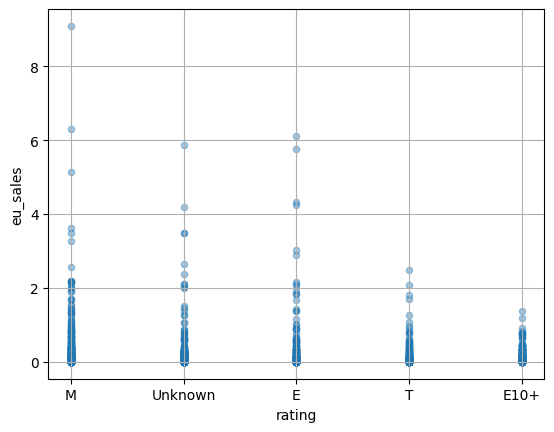

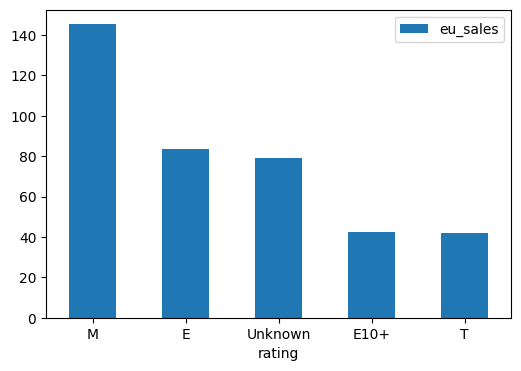

In [117]:
#смотрим на диаграмму рассеивания влияния рейтинга игр на продажи в регионе

eu_sales_rating = data.query('year_of_release >= 2013')

eu_sales_rating.plot(
kind='scatter',
y='eu_sales',
x= 'rating',
alpha= 0.4, 
grid=True,
);

eu_sales_rating = (data
    .query('year_of_release >= 2013')
    .pivot_table (index='rating', values = 'eu_sales', aggfunc = 'sum')
    .reset_index(drop=False).sort_values(by='eu_sales', ascending=False)
    .plot.bar(x='rating', rot=0, figsize = (6,4))

);
eu_sales_rating;

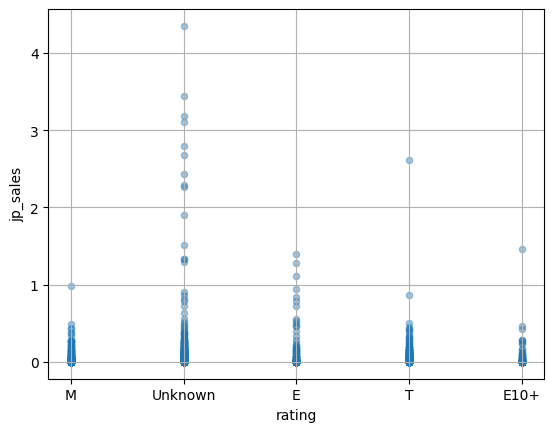

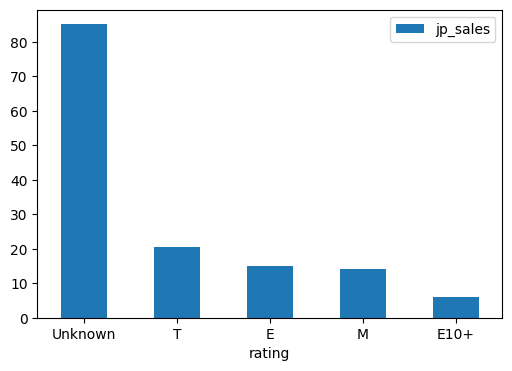

In [118]:
#смотрим на диаграмму рассеивания влияния рейтинга игр на продажи в регионе

jp_sales_rating = data.query('year_of_release >= 2013')

jp_sales_rating.plot(
kind='scatter',
y='jp_sales',
x= 'rating',
alpha= 0.4, 
grid=True,
);

jp_sales_rating = (data
    .query('year_of_release >= 2013')
    .pivot_table (index='rating', values = 'jp_sales', aggfunc = 'sum')
    .reset_index(drop=False).sort_values(by='jp_sales', ascending=False)
    .plot.bar(x='rating', rot=0, figsize = (6,4))

);
jp_sales_rating;

***В Северной Америке*** по данным графикам, мы видим, что `лучше всего покупают игры в с рейтингом М`, `хуже с рейттингом Т`.

***В Европе*** лучше всего продаются `игры с рейтингом М`, `хуже- с рейтингом Т`.

***В Японии*** лучше всего продаются `игры без рейтинга`, `хуже- с рейтингом E10+`.



## Проверка гипотез.

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

***Нулевая гипотеза*** - средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

***Альтернативная*** - средние пользовательские рейтинги платформ Xbox One и PC не одинаковые


In [119]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,global_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.00,8.00,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.00,8.30,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.00,8.00,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Unknown,31.38


In [120]:
XOne = data.query('year_of_release >= 2013 and platform == "XOne"')
XOne.dropna(subset=['user_score'], inplace=True) 
XOne = XOne[['user_score']]
XOne

,user_score
165,7.90
179,5.40
242,6.40
270,6.20
373,4.10
...,...
16544,6.80
16597,6.00
16630,8.20
16643,6.60


In [121]:
XOne = data.query('year_of_release >= 2013 and platform == "XOne"')
XOne.dropna(subset=['user_score'], inplace=True) 
XOne = XOne[['user_score']]

PC = data.query('year_of_release >= 2013 and platform == "PC"')
PC.dropna(subset=['user_score'], inplace=True) 
PC = PC[['user_score']]

alpha = .05
results = st.ttest_ind(XOne, PC, equal_var=False)
print ('р-значение равно:', results.pvalue)

if results.pvalue < alpha:
    print ('Отвергаем нулевую гипотезу')
else:
    print ('Не отвергаем нулевую гипотезу')

р-значение равно: [0.14759594]
Не отвергаем нулевую гипотезу


У нас есть 2 выборки из генеральной совокупности. Мы `сравниваем популярность 2х платформ за одинаковый период`, поэтому чтобы проверить `гипотезу о равенстве средних пользовательских рейтингах` используем метод ***st.ttest_ind*** с параметром ***equal_var=False***. Данный параметр мы использовали по причине того, что `выборки не однородны` и мы `не можем утверждать, что дисперсия примерно одинакова`.


В данном случае, мы не можем `отвергнуть нулевую гипотезу` по причине того, что `pvalue = 0.147` больше `уровня статистической значимости (alpha)`. То есть вероятность `случайно` получить одинаковые средние значения = примерно 15%.

### Средние пользовательские рейтинги жанров Action  и Sports разные.

***Нулевая гипотеза*** - средние пользовательские рейтинги жанров Action и Sports одинаковые.

***Альтернативная*** - средние пользовательские рейтинги жанров Action и Sports не одинаковые.

In [122]:
Action = data.query('year_of_release >= 2013 and genre == "Action"')
Action.dropna(subset=['user_score'], inplace=True) 
Action = Action[['user_score']]

Sports = data.query('year_of_release >= 2013 and genre == "Sports"')
Sports.dropna(subset=['user_score'], inplace=True) 
Sports = Sports[['user_score']]

alpha = .05
results = st.ttest_ind(Action, Sports, equal_var=False)
print ('р-значение равно:', results.pvalue)

if results.pvalue < alpha:
    print ('Отвергаем нулевую гипотезу')
else:
    print ('Не отвергаем нулевую гипотезу')

р-значение равно: [1.44600397e-20]
Отвергаем нулевую гипотезу


У нас есть 2 выборки из генеральной совокупности. Мы `сравниваем популярность 2х жанров за одинаковый период`, поэтому чтобы проверить `гипотезу о равенстве средних пользовательских рейтингах` используем метод ***st.ttest_ind*** с параметром ***equal_var=False***. Данный параметр мы использовали по причине того, что `выборки не однородны` и мы `не можем утверждать, что дисперсия примерно одинакова`.


В данном случае, мы можем `отвергнуть нулевую гипотезу` по причине того, что `pvalue = 1.446` меньше `уровня статистической значимости (alpha)`.

## Общий вывод:

**Изучение первичных данных.**

В данном ДФ `до обработки данных` 16715 строк и 11 колонок.
Обнаружили `пропуски` в столбцах: `название игры - 2, год релиза - 269, жанр - 2, оценка критиков - 8578, оценка пользователей - 6701, рейтинг ESRB - 6766`.
Столбец `год релиза`. В нем `269 пустых строк`, так как ***корректно заполнить эти данные мы можем только вручную*** (поиском года выхода игры в интернете) - `удаляем`. Их не так много для того, чтобы исказить данные, но для заполнения мы потратим слишком много времени.

Столбцы `название игры и жанр` удалили, т.к. их было всего 2 и на дальнейший анализ данных это `не повлияло`.
В столбце `рейтинг пользователей` находим значение `"tbd"` (рейтинг еще не определен).
Изучая столбец `рейтинг ESRB`, который обозначает возрастной ценз, видим, что `пропусков - 6676` и меняем на название `Unknown`(неизвестно).

Также, есть `4 малочисленные группы` ***EC(игры для дошкольников) - 8, K-A (базовые игры для взрослых и детей) - 3, АO (игры 18+) - 1, RP(игры без оценки) - 1***. Меняем значение `К-А` на `Е`, тк значение К-А использовалось до 1998 г., а после было изменено на Е.

Также изменили `рейтинг игры` ***Grand Theft Auto: San Andreas*** на `платформе XB`, т.к. по материалам с сайта `Microsoft не поддерживает игры категории АО` и данной игре присвоен рейтинг `М`.


**Исследовательский анализ данных.**

`Рост количества игр` начинается с 2000 года, а `пик пришелся на 2008-2009 года`, после идет резкий спад.

`Больше всего игр выпускались на 7 платформах:` ***PS2, DS, PS3, Wii, X360, PSP, PS.*** 

`Больше всего суммарных продаж по всему миру получили 6 платформ:` ***PS2, X360, PS3, Wii, DS, PS.*** И хотя, платформа `PSP` выпустила `1193 игры`, ***суммарная сумма продаж*** составила `289.53 миллионов` и находится на `9 месте среди всех продаж`.

`В среднем каждая платформа` "живет" ***4 года***. По этой причине для дальнейшего анализа я взяла ***период с 2013 по 2016 г.***.

`Топ-5` распределения платформ по количеству выпущенных игр `с 2013 по 2016 г.`:
1. PS4
2. PSV
3. PS3
4. 3DS
5. XOne

***Построив сводную таблицу и по ней график***, мы увидели, что с `2013 по 2016 год` продажи были только у `11 платформ`: ***XOne, X360, WiiU, Wii, PSV, PSP, PS4, PS3, PC, DS, 3DS***. 

А `больше всего продаж` у 5 платформ ***3DS, PS4, PS3, XOne, X360***.

Разберем данные по каждой из 5 платформ:
1. ***XOne***. `Лучшие продажи` у данной платформы были `в 2015 году`, немного меньше была выручка за 2014 год. А `в 2016 - продажи значительно упали по сравнению с 2015 г.`, примерно в 2 раза.

2. ***X360***. `Основные продажи пришлись на 2013 год`. С каждым годом, уровень продаж по всему миру `снижается`.

3. ***PS4*** в `2015 г. значительно обогнала всех своих конкурентов` по продажам и в `2016 г. не сдает своих позиций`.

4. ***PS3***. По данной платформе можно уверенно сказать, что `с 2013 года продажи стремительно падают`.

5. ***3DS***. Продажи по данной платформе, как и в предыдущем случае `падают, но равномерно`, однако, на данной платформе `выпускается достаточно много игр`.

***Наиболее прибыльные платформы за 2015-2016 г. - PS4, XOne, 3DS***

Изучив данные на взаимосвязь `между глобальными продажами игр на нужных нам платформах и отзывами пользователей `, мы выяснили, что никакой взаимосвязи нет.

Ситуация с корреляцией `между продажами и отзывами критиков значительно лучше` и составляет примерно `от 0.33 до 0.42`. Но эти данные также `не дают нам точно сказать, что взаимосвязь устойчива`.

На наших топ-5 платформах выпускались **наибольшее количество игр в жанре `Экшн`, а меньше всего - `Пазлы`.**
Исследование самых часто продаваемых жанров:

1. **XOne**. На данной платформе ***лидируют*** `игры в жанре "Шутер"`, ***меньше всего продаж*** приносят - `Приключения`, игр в жанре `Паззлы` ***совсем нет***.


2. **X360**. На данной платформе ***лидируют*** `игры в жанре "Ролевые игры"`, ***меньше всего продаж*** приносят - `Приключения`, игр в жанре `Паззлы` ***совсем нет***.


3. **PS4**. На данной платформе ***лидируют*** `игры в жанре "Шутер"`, ***меньше всего продаж*** приносят - `Паззлы`.


4. **PS3**. На данной платформе ***лидируют*** `игры в жанре "Шутер"`, ***меньше всего продаж*** приносят - `Паззлы и Приключения`.


5. **3DS**. На данной платформе ***лидируют*** `игры в жанре "Платформер"`, ***меньше всего продаж*** приносят - `Приключения, Шутеры, Симуляторы и Стратегии`,игр в жанре `Гонки` ***совсем нет***.


**Портрет пользователя каждого региона.**

Изучив данные , мы видим распределение `топ-5 платформ` по продажам в разных странах.

В `Северной Америке`: PS4, XOne, X360, PS3, 3DS.
`Европа` : PS4, PS3, XOne, X360, 3DS. 
`Япония`: 3DS, PS3, PSV, PS4, WiiU.

В ***Северной Америке и Европе*** популярные платформы `одинаковые`, отличаются только местом в рейтинге, в то время, как в ***Японии*** совсем другие платформы в рейтинге, например, `PSV, WiiU`.

Распределение `популярности жанров топ-5 по регионам`.
В `Северной Америке` лидирует `жанр Экшн`, замыкает топ-5 -`Misc (Онлайн-шутер)`.
В `Европе` также распределены `самые популярные жанры`, на 1 месте `Экшн`, а на 5 месте- `Гонки`.
В `Японии` совсем другое распределение топ-5. Например, на `1 месте- Ролевые игры`, на 3 месте - `Онлайн-шутер`, на 4- `Бои` и замыкает топ-5 - `Шутер`.
Можно заметить, что `во всех странах любят игры в жанре- Экшн и Шутеры`.

***В Северной Америке*** `лучше всего покупают игры в с рейтингом М`, `хуже с рейттингом Т`.
***В Европе*** лучше всего продаются `игры с рейтингом М`, `хуже- с рейтингом Т`.
***В Японии*** лучше всего продаются `игры без рейтинга`, `хуже- с рейтингом E10+`.

**Проверка гипотез.**

В данной теме мы проверяли `2 гипотезы`:

1. ***Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.***

H0 - `Средние пользовательские рейтинги платформ Xbox One и PC одинаковые`.

H1- `Средние пользовательские рейтинги платформ Xbox One и PC не одинаковые`.

Данную гипотезу мы не смогли опровергнуть, т.к. `pvalue = 0.147` больше `уровня статистической значимости (alpha)`. То есть вероятность `случайно` получить одинаковые средние значения = примерно 15%.

2. ***Средние пользовательские рейтинги жанров Action  и Sports разные.***

H0 - `Средние пользовательские рейтинги жанров Action  и Sports одинаковые.`

H1 - `Средние пользовательские рейтинги жанров Action  и Sports разные.`

В данном случае, мы можем `отвергнуть нулевую гипотезу` по причине того, что `pvalue = 1.446` меньше `уровня статистической значимости (alpha)`.